In [98]:
import h5py
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import sklearn

In [99]:
matplotlib.rcParams.update({'font.size': 16,  'mathtext.fontset': 'stix'})

matplotlib.rcParams['figure.figsize'] = (9.7082039325, 6.0)
matplotlib.rcParams['xtick.labelsize'] = 16.0
matplotlib.rcParams['ytick.labelsize'] = 16.0
matplotlib.rcParams['axes.labelsize'] = 18.0

In [100]:
MSUN_SECONDS = 4.92720047e-6
MSUN_METERS = 1477.13754
MPC_METERS = 3.086e+22

In [101]:
try:
  import pycbc
except:
  ! pip install pycbc
  import pycbc
from pycbc import waveform
from pycbc import psd

# Numerical Data

In [102]:
try: 
  import watpy
except:
  ! pip install core-watpy
  import watpy
from watpy.coredb import coredb

In [103]:
os.makedirs('./CoRe_DB_clone', exist_ok=True) 
db_path = './CoRe_DB_clone/'
cdb = coredb.CoRe_db(db_path)

Index found, updating...

git-pull core_database_index ...
 
done!
skip core_database_index, not a DB key
 Found R01
 Found R02
 Found R05
 Found R04
 Found R03
Found BAM:0095
 Found R01
 Found R02
 Found R03
Found THC:0088
 Found R01
 Found R02
Found THC:0086
 Found R01
 Found R02
Found THC:0074
 Found R01
Found THC:0087
 Found R01
 Found R02
Found THC:0073
 Found R01
 Found R02
 Found R03
Found THC:0089
 Found R01
 Found R02
Found THC:0093
 Found R01
Found THC:0033
 Found R01
Found THC:0034
 Found R01
Found THC:0092
 Found R01
Found THC:0035
 Found R01
Found THC:0032
 Found R01
 Found R02
Found THC:0049
 Found R01
 Found R02
 Found R03
Found THC:0030
 Found R01
 Found R02
 Found R03
Found THC:0090
 Found R01
Found THC:0031
 Found R01
Found THC:0098
 Found R01
 Found R02
 Found R03
Found THC:0091


In [104]:
cdb.idb.index[0].data.keys() # metadata for first simulation

dict_keys(['database_key', 'available_runs', 'simulation_name', 'binary_type', 'reference_bibkeys', 'id_code', 'id_type', 'id_mass', 'id_rest_mass', 'id_mass_ratio', 'id_ADM_mass', 'id_ADM_angularmomentum', 'id_gw_frequency_Hz', 'id_gw_frequency_Momega22', 'id_eos', 'id_kappa2T', 'id_Lambda', 'id_eccentricity', 'id_mass_starA', 'id_rest_mass_starA', 'id_spin_starA', 'id_LoveNum_kell_starA', 'id_Lambdaell_starA', 'id_mass_starB', 'id_rest_mass_starB', 'id_spin_starB', 'id_LoveNum_kell_starB', 'id_Lambdaell_starB', 'evolution_code', 'grid_refinement_levels', 'grid_refinement_levels_moving', 'grid_refinement_levels_npoints', 'grid_refinement_levels_moving_npoints', 'grid_spacing_min', 'grid_symmetries', 'grid_shells', 'grid_shells_radial_npoints', 'grid_shells_angular_npoints', 'grid_conservative_amr', 'subgrid_model', 'metric_scheme', 'metric_boundary_conditions', 'hydro_flux', 'hydro_reconstruction', 'hydro_atmosphere_level', 'hydro_atmosphere_factor', 'number_of_orbits', 'evolution_mol

In [105]:
simkey = 'BAM:0095'
cdb.sync(dbkeys=[simkey], verbose=False, lfs=True, prot='https')
print(cdb.sim[simkey].run.keys()) # resolutions

git-pull BAM_0095 ...
done!
skip core_database_index, not a DB key
 Found R01
 Found R02
 Found R05
 Found R04
 Found R03
Found BAM:0095
 Found R01
 Found R02
 Found R03
Found THC:0088
 Found R01
 Found R02
Found THC:0086
 Found R01
 Found R02
Found THC:0074
 Found R01
Found THC:0087
 Found R01
 Found R02
Found THC:0073
 Found R01
 Found R02
 Found R03
Found THC:0089
 Found R01
 Found R02
Found THC:0093
 Found R01
Found THC:0033
 Found R01
Found THC:0034
 Found R01
Found THC:0092
 Found R01
Found THC:0035
 Found R01
Found THC:0032
 Found R01
 Found R02
Found THC:0049
 Found R01
 Found R02
 Found R03
Found THC:0030
 Found R01
 Found R02
 Found R03
Found THC:0090
 Found R01
Found THC:0031
 Found R01
Found THC:0098
 Found R01
 Found R02
 Found R03
Found THC:0091
dict_keys(['R01', 'R02', 'R05', 'R04', 'R03'])


In [106]:
print(cdb.sim[simkey].md.data.keys()) # metadata 

dict_keys(['database_key', 'available_runs', 'simulation_name', 'binary_type', 'reference_bibkeys', 'id_code', 'id_type', 'id_mass', 'id_rest_mass', 'id_mass_ratio', 'id_ADM_mass', 'id_ADM_angularmomentum', 'id_gw_frequency_Hz', 'id_gw_frequency_Momega22', 'id_eos', 'id_kappa2T', 'id_Lambda', 'id_eccentricity', 'id_mass_starA', 'id_rest_mass_starA', 'id_spin_starA', 'id_LoveNum_kell_starA', 'id_Lambdaell_starA', 'id_mass_starB', 'id_rest_mass_starB', 'id_spin_starB', 'id_LoveNum_kell_starB', 'id_Lambdaell_starB', 'evolution_code', 'grid_refinement_levels', 'grid_refinement_levels_moving', 'grid_refinement_levels_npoints', 'grid_refinement_levels_moving_npoints', 'grid_spacing_min', 'grid_symmetries', 'grid_shells', 'grid_shells_radial_npoints', 'grid_shells_angular_npoints', 'grid_conservative_amr', 'subgrid_model', 'metric_scheme', 'metric_boundary_conditions', 'hydro_flux', 'hydro_reconstruction', 'hydro_atmosphere_level', 'hydro_atmosphere_factor', 'number_of_orbits', 'evolution_mol

In [107]:
cdb.sim[simkey].md.data['id_spin_starB'] # confirm zero spin

'0.000000e+00, 0.000000e+00, 0.000000e+00'

In [108]:
cdb.sim[simkey].md.data['id_eos'] # 

'SLy'

In [109]:
cdb.sim[simkey].md.data['reference_bibkeys'] # confirm zero spin

'Dietrich:2017aum'

In [110]:
mtot = float(cdb.sim[simkey].md.data['id_mass'])
mass1 = float(cdb.sim[simkey].md.data['id_mass_starA'])
mass2 = float(cdb.sim[simkey].md.data['id_mass_starB']) 
lambda1 = float(cdb.sim[simkey].md.data['id_Lambdaell_starA'].split(',')[0])
lambda2 = float(cdb.sim[simkey].md.data['id_Lambdaell_starB'].split(',')[0])
start_freq = float(cdb.sim[simkey].md.data['id_gw_frequency_Hz'])
print('m1: ' ,mass1, 'm2: ' , mass2, 'l1: ', lambda1, 'l2: ', lambda2, 'start freq ',start_freq)

m1:  1.349998 m2:  1.349998 l1:  390.1104 l2:  390.1104 start freq  453.3283


In [111]:
res01 = cdb.sim[simkey].run['R01'].data.read_dset()
res01.keys()
res01['rh_22'].keys()
#res01['rh_22']['Rh_l2_m2_r00400.txt']

dict_keys(['Rh_l2_m2_r00700.txt', 'Rh_l2_m2_r00750.txt', 'Rh_l2_m2_r00800.txt', 'Rh_l2_m2_r00850.txt', 'Rh_l2_m2_r00900.txt', 'Rh_l2_m2_r01000.txt'])

In [112]:
# From David - header
 # u/M:0 Reh/M:1 Imh/M:2 Redh:3 Imdh:4 Momega:5 A/M:6 phi:7 t:8
# Where "M" is the total mass. "u" is the retarded time, "dh" is the first
# derivative of the strain (not Psi4), "omega" is the derivative of the
# phase, "A" is the amplitude, "phi" is the phase, and "t" is the time in
# Msun.


In [113]:
sim01 = pd.DataFrame(
    cdb.sim[simkey].run['R01'].data.read_dset()['rh_22']['Rh_l2_m2_r01000.txt'],
    columns=['t_ret','h22_plus','h22_cross','dh_plus','dh_cross','omega','amplitude','phase','t']
    )

In [114]:
sim02 = pd.DataFrame(
    cdb.sim[simkey].run['R02'].data.read_dset()['rh_22']['Rh_l2_m2_r01000.txt'],
    columns=['t_ret','h22_plus','h22_cross','dh_plus','dh_cross','omega','amplitude','phase','timesteps']
    )

In [115]:
sim03 = pd.DataFrame(
    cdb.sim[simkey].run['R03'].data.read_dset()['rh_22']['Rh_l2_m2_r01000.txt'],
    columns=['t_ret','h22_plus','h22_cross','dh_plus','dh_cross','omega','amplitude','phase','timesteps']
    )

In [116]:
cdb.sim[simkey].run['R04'].data.read_dset()['rh_22'].keys()

dict_keys(['Rh_l2_m2_r00700.txt', 'Rh_l2_m2_r00750.txt', 'Rh_l2_m2_r00800.txt', 'Rh_l2_m2_r00850.txt', 'Rh_l2_m2_r00900.txt', 'Rh_l2_m2_r01000.txt'])

In [117]:
sim04 = pd.DataFrame(
    cdb.sim[simkey].run['R04'].data.read_dset()['rh_22']['Rh_l2_m2_r01000.txt'],
    columns=['t_ret','h22_plus','h22_cross','dh_plus','dh_cross','omega','amplitude','phase','timesteps']
    )

In [118]:
sim05 = pd.DataFrame(
    cdb.sim[simkey].run['R05'].data.read_dset()['rh_22']['Rh_l2_m2_r01000.txt'],
    columns=['t_ret','h22_plus','h22_cross','dh_plus','dh_cross','omega','amplitude','phase','timesteps']
    )

In [119]:
simlist = [sim01,sim02]#,sim03,sim04]#,sim05]
namelist = ['NR Res1','NR Res2']#,'R03','R04']#,'R05']

In [120]:
for sim in simlist:
  sim.delta_t = np.average(np.array(sim['t_ret'])[1:]-np.array(sim['t_ret'])[:-1])

In [121]:
for sim in simlist:
  # a temporary amplitude array to isolate the inspiral-to-merger
  # 0.035 was picked based on a plot of amplitude
  amplitude = np.array(sim['amplitude'])[np.array(sim['t_ret']*mtot*MSUN_SECONDS)<0.035 ]
  # peak amplitude ~ time of contact of stars ~ end of chirp
  chirp_index = np.argmax(amplitude) 
  # merger ~ minimum amplitude after contact ~ start of postmerger
  postmerger_index = chirp_index + scipy.signal.find_peaks(-1.*amplitude[chirp_index:])[0][0] 
  zero_index = np.argmin(abs(np.array(sim['t_ret'])-150))
  sim.chirp_index = chirp_index
  sim.postmerger_index = postmerger_index
  sim.zero_index = zero_index
  print(zero_index)

1528
1146


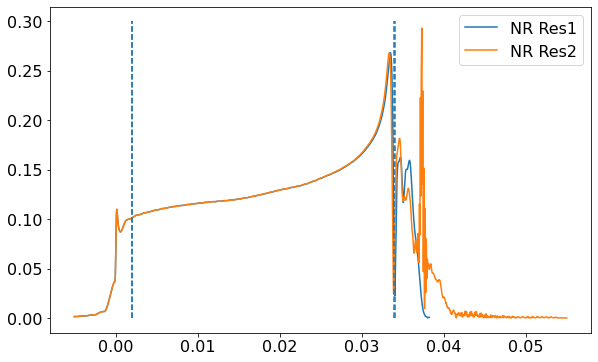

In [122]:
for sim, name in zip(simlist,namelist):
  plt.plot(sim['t_ret']*mtot*MSUN_SECONDS,sim['amplitude'], label=name)
  plt.vlines(np.array(sim['t_ret'])[[sim.zero_index, sim.postmerger_index]]*mtot*MSUN_SECONDS,0,0.3,linestyles='dashed')
plt.legend()


In [123]:
for sim in simlist:
  sim['freq_inst'] = np.gradient( np.array(sim['phase'])/2/np.pi, sim.delta_t*mtot*MSUN_SECONDS)
  #sim['freq_calc'] = np.gradient( np.array(sim['phase']), sim.delta_t*mtot*MSUN_SECONDS)
  sim['fdot'] = np.gradient( np.array(sim['freq_inst']), sim.delta_t*mtot*MSUN_SECONDS)


(300, 5000)

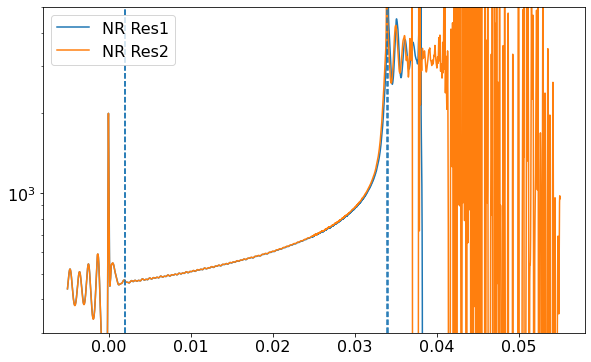

In [124]:
for sim, name in zip(simlist,namelist):
  plt.semilogy(sim['t_ret']*mtot*MSUN_SECONDS,sim['freq_inst'], label=name)
  plt.vlines(np.array(sim['t_ret'])[[sim.zero_index, sim.postmerger_index]]*mtot*MSUN_SECONDS,300,5000,linestyles='dashed')
plt.legend()
plt.ylim(300,5000)

(10000.0, 100000000.0)

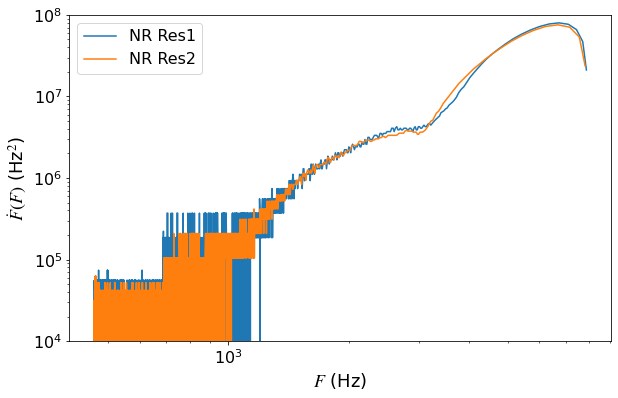

In [125]:
for sim,name in zip(simlist,namelist):
  plt.loglog(sim['freq_inst'][sim.zero_index:sim.postmerger_index],
  sim['fdot'][sim.zero_index:sim.postmerger_index], label=name)
plt.xlabel(r'$F$ (Hz)')
plt.ylabel(r'$\dot F (F)$ (Hz$^2$)')
plt.legend()
plt.ylim(1e4,1e8)
# Without smoothing, doesn't resolve well below 1 kHz

In [126]:
print(
    [ sim['freq_inst'][sim.chirp_index] for sim in simlist] )

[2003.3674815264353, 2005.0854366592703]


In [127]:
np.array(sim['t_ret'])[sim.zero_index:sim.postmerger_index]

array([ 150.1623,  150.6265,  151.0906, ..., 2547.282 , 2547.746 ,
       2548.21  ])

In [128]:
for sim in simlist:
    tck = scipy.interpolate.splrep(
        np.array(sim['t_ret'])[sim.zero_index:sim.postmerger_index],
        np.log(np.array(sim['freq_inst'])[sim.zero_index:sim.postmerger_index]), 
        s=0.04)
    newvals = np.exp(scipy.interpolate.splev(np.array(sim['t_ret']),tck)) 
#    newvals[np.logical_not(np.isfinite(newvals))]=0 # set nans and infs to zero if going beyond zero_index:postmerger_index
#    newvals[newvals>6000]=6000 # threshold at 5000 Hz if going beyond zero_index:postmerger_index
    sim['freq_smooth']=newvals

(0.0, 0.02)

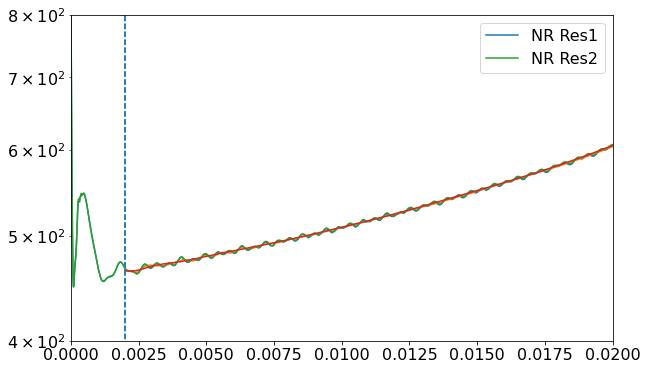

In [129]:
#Verify reasonable smoothing near start of simulations

for sim, name in zip(simlist,namelist):
  plt.semilogy(sim['t_ret']*mtot*MSUN_SECONDS,sim['freq_inst'], label=name),
  plt.semilogy(sim['t_ret'][sim.zero_index:sim.postmerger_index]*mtot*MSUN_SECONDS,
            sim['freq_smooth'][sim.zero_index:sim.postmerger_index]),
  plt.vlines(np.array(sim['t_ret'])[[sim.zero_index, sim.postmerger_index]]*mtot*MSUN_SECONDS,300,5000,linestyles='dashed')
plt.legend()
plt.ylim(400,800)
plt.xlim(0,0.02)

(0.032, 0.0345)

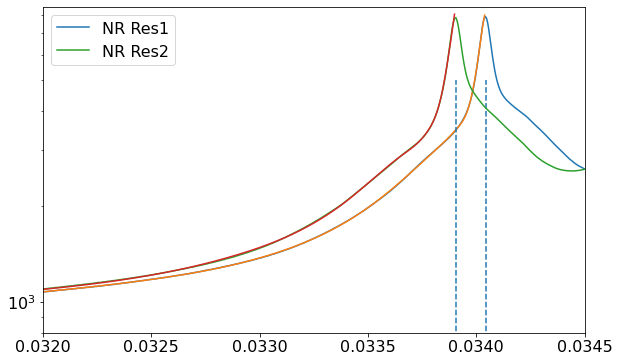

In [193]:
#Verify reasonable smoothing up to merger

for sim, name in zip(simlist,namelist):
  plt.semilogy(sim['t_ret']*mtot*MSUN_SECONDS,sim['freq_inst'], label=name),
  plt.semilogy(sim['t_ret'][sim.zero_index:sim.postmerger_index]*mtot*MSUN_SECONDS,
            sim['freq_smooth'][sim.zero_index:sim.postmerger_index]),
  plt.vlines(np.array(sim['t_ret'])[[sim.zero_index, sim.postmerger_index]]*mtot*MSUN_SECONDS,300,5000,linestyles='dashed')
plt.legend()
plt.ylim(800,8500)
plt.xlim(0.032,0.0345)

In [131]:
for sim in simlist:
  sim['fdot_smooth'] = np.gradient( np.array(sim['freq_smooth']), sim.delta_t*mtot*MSUN_SECONDS)


(400, 4000)

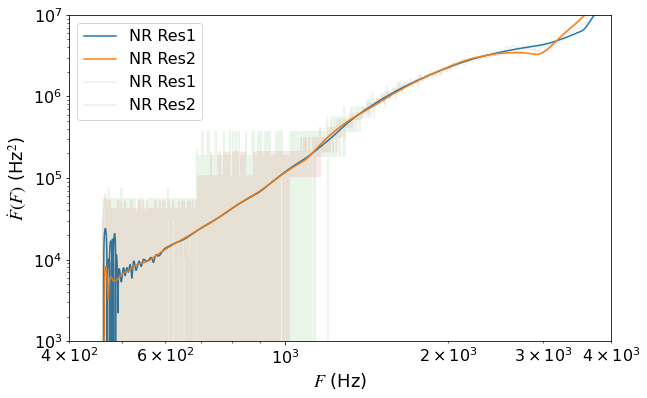

In [133]:
# compare to frequency derivative without smoothing

for sim,name in zip(simlist,namelist):
  plt.loglog(sim['freq_smooth'][sim.zero_index:sim.postmerger_index],
  sim['fdot_smooth'][sim.zero_index:sim.postmerger_index],
  label=name)
for sim,name in zip(simlist,namelist):
  plt.loglog(sim['freq_inst'][sim.zero_index:sim.postmerger_index],
  sim['fdot'][sim.zero_index:sim.postmerger_index], alpha=0.1,label=name)
plt.xlabel(r'$F$ (Hz)')
plt.ylabel(r'$\dot F (F)$ (Hz$^2$)')
plt.legend(loc='upper left')
plt.ylim(1e3,1e7)
plt.xlim(400,4000)

# Generate Semianalytic Waveforms

In [134]:
print(lambda1,lambda2)

390.1104 390.1104


In [135]:
f_low_compare=50
distance_ref = 100

In [136]:
np.sqrt(5/(4.0*np.pi))

0.6307831305050401

In [137]:
qopt = np.sqrt(5 / (64 * np.pi))*4
for sim in simlist:
  sim['strain_amplitude'] = sim['amplitude']* mtot * MSUN_METERS / MPC_METERS /100. * qopt
  

In [138]:
np.sqrt(1/64.)*4

0.5

In [139]:
approx_list = ['TEOBResumS','SEOBNRv4T']
strainmodels = {}

for apx in approx_list:
    hp,hc= waveform.get_td_waveform(approximant=apx,
                                 mass1=mass1,
                                 mass2=mass2,
                                 lambda1= lambda1,
                                 lambda2=lambda2 ,
                                 distance= distance_ref,
                                 delta_t=1.0/4096/4,
                                 f_lower=f_low_compare)
    strainmodels[apx] = {}
    strainmodels[apx]['strain_plus'] = hp
    strainmodels[apx]['strain_cross'] = hc
    strainmodels[apx]['strain_amplitude'] = waveform.utils.amplitude_from_polarizations(hp, hc)
    strainmodels[apx]['strain_phase'] = waveform.utils.phase_from_polarizations(hp, hc) 
    #plt.plot(hp.sample_times, hp, label=apx)


# add also a BBH model with same masses
hp,hc= waveform.get_td_waveform(approximant='SEOBNRv4',
                                 mass1=mass1,
                                 mass2=mass2,
                                 lambda1= 0,
                                 lambda2=0 ,
                                 distance= distance_ref,
                                 delta_t=1.0/4096/4,
                                 f_lower=f_low_compare)
strainmodels['BBH'] = {}
strainmodels['BBH']['strain_plus'] = hp
strainmodels['BBH']['strain_cross'] = hc
strainmodels['BBH']['strain_amplitude'] = waveform.utils.amplitude_from_polarizations(hp, hc)
strainmodels['BBH']['strain_phase'] = waveform.utils.phase_from_polarizations(hp, hc) 

approx_list.append('BBH')

In [140]:
# instantaneous frequency
for apx in approx_list:
   dphi = np.gradient(
      np.array(strainmodels[apx]['strain_phase']), 
      strainmodels[apx]['strain_phase'].delta_t)
   strainmodels[apx]['freq'] = dphi / (2 * np.pi)
   strainmodels[apx]['fdot'] = np.gradient(strainmodels[apx]['freq'], strainmodels[apx]['strain_phase'].sample_times)
   strainmodels[apx]['time_gradient'] = 1. / strainmodels[apx]['fdot']  

/var/folders/5w/kb6yrjj55738nlr7796lgkzh0000gp/T/ipykernel_33182/540736987.py:8: RuntimeWarning: divide by zero encountered in true_divide
  strainmodels[apx]['time_gradient'] = 1. / strainmodels[apx]['fdot']


In [211]:
for apx in approx_list:
# promote time to a column for easy access
   strainmodels[apx]['time'] = strainmodels[apx]['strain_plus'].sample_times
# maximum frequency ~ end of inspiral
   chirp_index = np.argmax(strainmodels[apx]['freq']) 
   strainmodels[apx]['chirp'] = chirp_index
# lowest common frequency of inspirals: we will need to chose f_c at or below this value
common_upper_freq = np.min([strainmodels[apx]['freq'][strainmodels[apx]['chirp']] for apx in approx_list])
#common_upper_freq = 1500
print(common_upper_freq)


1787.5710088165374
466.7364686104239


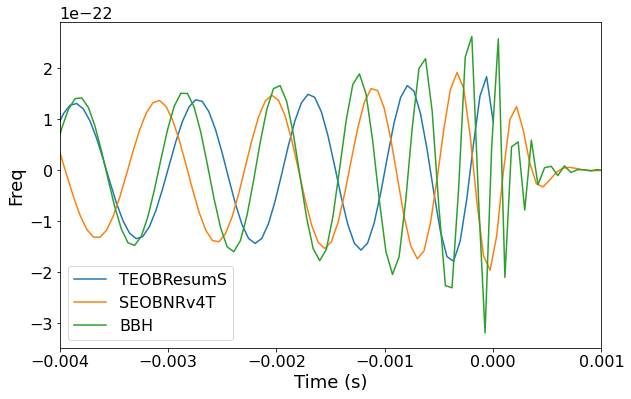

In [142]:
# for comparison each waveform was generated with the same phic and tc value
# but obviously they differ by overall shifts... so the models disagree about what fc *is*
for apx in approx_list:
    plt.plot(
        strainmodels[apx]['time'],      
        strainmodels[apx]['strain_plus'], 
        label=apx)
plt.ylabel('Freq')
plt.xlabel('Time (s)')
plt.xlim(-0.004,0.001)
plt.legend()
plt.show()

In [143]:
# find the time and phase at the reference frequency

for apx in approx_list:
    strainmodels[apx]['tc'] = np.interp(
        common_upper_freq, 
        strainmodels[apx]['freq'][:strainmodels[apx]['chirp']],
        strainmodels[apx]['time'][:strainmodels[apx]['chirp']])
    strainmodels[apx]['phic'] = np.interp(
        common_upper_freq, 
        strainmodels[apx]['freq'][:strainmodels[apx]['chirp']],
        strainmodels[apx]['strain_phase'][:strainmodels[apx]['chirp']])
    
    print(strainmodels[apx]['phic'] ,strainmodels[apx]['tc'] )
    
for sim in simlist:
    sim.tc = np.interp(
        common_upper_freq, 
        sim['freq_smooth'][sim.zero_index:sim.postmerger_index],
        sim['t_ret'][sim.zero_index:sim.postmerger_index] # this is still in simulation units of M
    )
    sim.phic = np.interp(
        common_upper_freq, 
        sim['freq_smooth'][sim.zero_index:sim.postmerger_index],
        sim['phase'][sim.zero_index:sim.postmerger_index]
    )
print([strainmodels[apx]['tc'] for apx in approx_list])
print([sim.tc *mtot*MSUN_SECONDS for sim in simlist])

7385.766924095164 -5.968946875078984e-05
7410.350821253504 -9.240668609429255e-05
7421.94373280074 -0.0007834257804907088
[-5.968946875078984e-05, -9.240668609429255e-05, -0.0007834257804907088]
[0.03339980022656836, 0.03326010504463116]


(-0.01, 0.01)

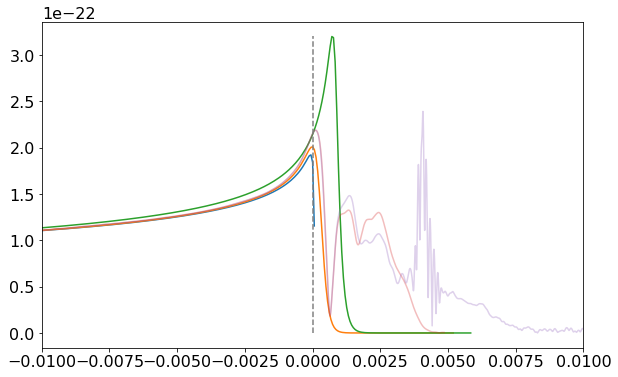

In [144]:
for apx in approx_list:
    plt.plot(strainmodels[apx]['time'] - strainmodels[apx]['tc'],
                strainmodels[apx]['strain_amplitude'], label=apx
    )

for sim,name in zip(simlist,namelist):
  plt.plot((sim['t_ret'] - sim.tc)*mtot*MSUN_SECONDS,
      sim['strain_amplitude'], label=name, alpha=0.3) #

plt.vlines(0,0,3.2e-22,color='grey', linestyle='dashed')
plt.xlim(-0.01,0.01)

(-0.01, 0.01)

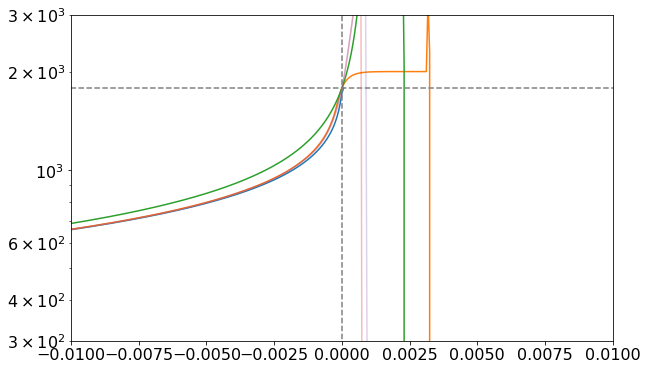

In [145]:
for apx in approx_list:
    plt.semilogy(strainmodels[apx]['time'] - strainmodels[apx]['tc'],
                strainmodels[apx]['freq'], label=apx
    )

for sim,name in zip(simlist,namelist):
  plt.semilogy((sim['t_ret'] - sim.tc)*mtot*MSUN_SECONDS,
      sim['freq_smooth'], label=name, alpha=0.3) #
plt.vlines(0,1,6000,color='grey', linestyle='dashed')
plt.hlines(common_upper_freq,-0.1,0.1,color='grey', linestyle='dashed')
plt.ylim(300,3000)
plt.xlim(-0.01,0.01)

In [146]:
freq_approx_list = ['TaylorF2','IMRPhenomD_NRTidalv2']#,'TaylorF2']
delta_f_list = [0.02,0.02]
freqmodels = {}
for i,apx in enumerate(freq_approx_list):
    hp,hc= waveform.get_fd_waveform(approximant=apx,
                                 mass1=mass1,
                                 mass2=mass2,
                                 lambda1= lambda1,
                                 lambda2=lambda2 ,
                                 distance = distance_ref,
                                 delta_f=delta_f_list[i],
                                 f_lower=f_low_compare)
    freqmodels[apx] = {}
    freqmodels[apx]['name'] = apx
    freqmodels[apx]['htilde_plus'] = hp
    freqmodels[apx]['htile_cross'] = hc
    freqmodels[apx]['freq'] = hp.sample_frequencies
    freqmodels[apx]['htilde_amplitude'] = waveform.utils.amplitude_from_frequencyseries(hp)
    freqmodels[apx]['htilde_phase'] = waveform.utils.phase_from_frequencyseries(hp,remove_start_phase=False) 
    freqmodels[apx]['htilde_time'] = waveform.utils.time_from_frequencyseries(hp, discont_threshold=4)   


freqmodels['IMRPhenomD_NRTidalv2']['name']= 'IMRPhen_NRT'

In [147]:
for apx in freq_approx_list:
    print( len(freqmodels[apx]['freq']), len(freqmodels[apx]['htilde_time']))
    freqmodels[apx]['fdot'] = np.gradient(freqmodels[apx]['freq'][1:],freqmodels[apx]['htilde_time'])

81430 81429
262145 262144


/Users/jocelynread/mambaforge/envs/igwn/lib/python3.10/site-packages/numpy/lib/function_base.py:1215: RuntimeWarning: divide by zero encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/Users/jocelynread/mambaforge/envs/igwn/lib/python3.10/site-packages/numpy/lib/function_base.py:1215: RuntimeWarning: invalid value encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/Users/jocelynread/mambaforge/envs/igwn/lib/python3.10/site-packages/numpy/lib/function_base.py:1216: RuntimeWarning: divide by zero encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
/Users/jocelynread/mambaforge/envs/igwn/lib/python3.10/site-packages/numpy/lib/function_base.py:1216: RuntimeWarning: invalid value encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
/Users/jocelynread/mambaforge/envs/igwn/lib/python3.10/site-packages/numpy/lib/function_base.py:1217: RuntimeWarning: divide by zero encountered in true_divide
  c = dx1 / (dx2 * (dx1 + dx2))
/Users/jocelynread/mambaforge/envs/igwn/

In [148]:
for apx in freq_approx_list:
     freqmodels[apx]['strain_amplitude'] =  (
        np.abs(freqmodels[apx]['htilde_amplitude'][1:]) * np.power(freqmodels[apx]['fdot'] , 1.0/2.0))  

/var/folders/5w/kb6yrjj55738nlr7796lgkzh0000gp/T/ipykernel_33182/2951891282.py:3: RuntimeWarning: invalid value encountered in power
  np.abs(freqmodels[apx]['htilde_amplitude'][1:]) * np.power(freqmodels[apx]['fdot'] , 1.0/2.0))
/Users/jocelynread/mambaforge/envs/igwn/lib/python3.10/site-packages/pycbc/types/array.py:213: RuntimeWarning: invalid value encountered in multiply
  ret = getattr(ufunc, method)(*inputs, **kwargs)


# Characteristic Functions T' and mathcal{A}

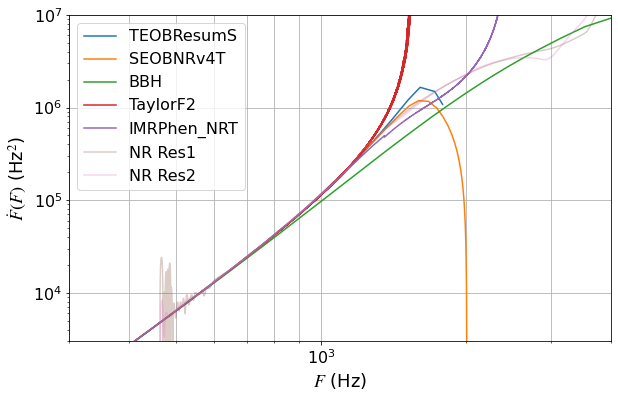

In [194]:
for apx in approx_list:
    if apx=='SEOBNRv4T':
      fcut = np.argmax(strainmodels[apx]['fdot'][:strainmodels[apx]['chirp']])
    else:
      fcut = len(strainmodels[apx]['fdot'])
    plt.loglog(strainmodels[apx]['freq'][:fcut],
                strainmodels[apx]['fdot'][:fcut], label=apx
    )

for apx in freq_approx_list:
    fcut = np.argmax(freqmodels[apx]['fdot'][1:]>3e7)
    plt.loglog( (freqmodels[apx]['freq'][1:])[:fcut],freqmodels[apx]['fdot'][:fcut], label=freqmodels[apx]['name'])

for sim,name in zip(simlist,namelist):
  plt.loglog(sim['freq_smooth'][sim.zero_index:sim.postmerger_index],
  sim['fdot_smooth'][sim.zero_index:sim.postmerger_index], label=name, alpha=0.3) #
plt.xlabel(r'$F$ (Hz)')
plt.ylabel(r'$\dot F (F)$ (Hz$^2$)')
plt.legend(loc='upper left')
plt.xlim(300,4000)
plt.ylim(3e3,1e7)
plt.grid(axis='y')
plt.grid(axis='x', which='both')
plt.savefig('fdot-compare.png', dpi=300, bbox_inches='tight')

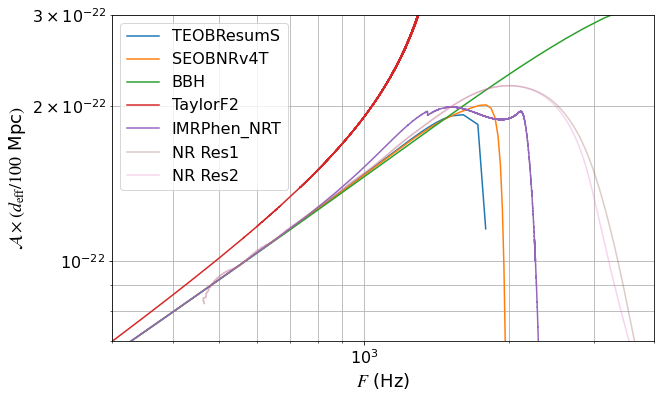

In [195]:
for apx in approx_list:
    plt.loglog(strainmodels[apx]['freq'],
                strainmodels[apx]['strain_amplitude'], label=apx
    )
for apx in freq_approx_list:
    plt.loglog(freqmodels[apx]['freq'][1:], 2* freqmodels[apx]['strain_amplitude'], label=freqmodels[apx]['name'])

for sim,name in zip(simlist,namelist):
  plt.loglog(sim['freq_smooth'][sim.zero_index:sim.postmerger_index],
  sim['strain_amplitude'][sim.zero_index:sim.postmerger_index] , 
                label=name, alpha=0.3)#
plt.xlabel(r'$F$ (Hz)')
plt.ylabel(r'$\mathcal{A}\times ( d_\mathrm{eff} / 100$ Mpc$)$ ')
plt.legend(loc='upper left')
plt.xlim(300,4000)
plt.ylim(7e-23,3e-22)
plt.grid( which='both')
plt.savefig('strainamp-compare.png', dpi=300, bbox_inches='tight')

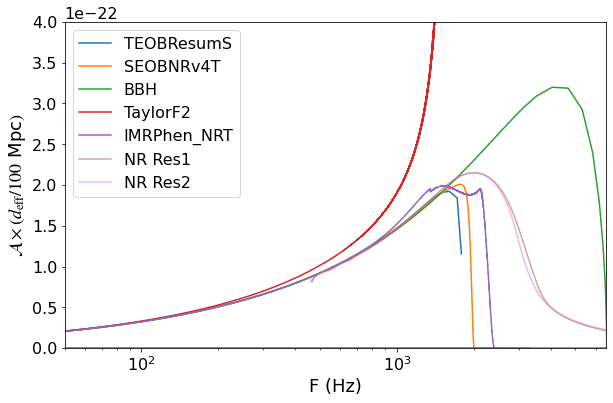

In [280]:

#
for apx in approx_list:
    plt.semilogx(strainmodels[apx]['freq'], 
                 strainmodels[apx]['strain_amplitude'] ,label=apx)
for apx in freq_approx_list:
    plt.semilogx(freqmodels[apx]['freq'][1:], 
            2 *freqmodels[apx]['strain_amplitude'], 
           label=freqmodels[apx]['name'])

  
for sim,name in zip(simlist,namelist):
  plt.semilogx(sim['freq_smooth'][sim.zero_index:sim.postmerger_index],
               sim['amplitude'][sim.zero_index:sim.postmerger_index] 
               * mtot * MSUN_METERS / MPC_METERS /100.*62/100, 
               label =name, alpha=0.5)
plt.legend()
plt.ylabel(r'$\mathcal{A}\times ( d_\mathrm{eff} / 100$ Mpc$)$ ')
plt.xlabel('F (Hz)')
plt.xlim(50,6600)
plt.ylim(0,4e-22)
plt.legend()
plt.show()

In [152]:
modref = 'BBH'

In [153]:

for apx in approx_list:
    strainmodels[apx]['dStrainAmp'] = (
        -strainmodels[modref]['strain_amplitude'][:strainmodels[modref]['chirp']] 
        + np.interp(strainmodels[modref]['freq'][:strainmodels[modref]['chirp']],
                strainmodels[apx]['freq'][:strainmodels[apx]['chirp']],
                strainmodels[apx]['strain_amplitude'][:strainmodels[apx]['chirp']])
        ) / strainmodels[modref]['strain_amplitude'][:strainmodels[modref]['chirp']]

for apx in freq_approx_list:
    freqmodels[apx]['dStrainAmp'] = (
        -strainmodels[modref]['strain_amplitude'][:strainmodels[modref]['chirp']] 
        + np.interp(strainmodels[modref]['freq'][:strainmodels[modref]['chirp']],
                freqmodels[apx]['freq'][1:],
                2*freqmodels[apx]['strain_amplitude'])
         ) / strainmodels[modref]['strain_amplitude'][:strainmodels[modref]['chirp']]

simdata={}

for sim,name in zip(simlist,namelist):
        simdata[name]={}
        simdata[name]['dStrainAmp']= (
                -strainmodels[modref]['strain_amplitude'][:strainmodels[modref]['chirp']]
                + np.interp(strainmodels[modref]['freq'][:strainmodels[modref]['chirp']],
                sim['freq_smooth'][sim.zero_index:sim.postmerger_index],
                sim['strain_amplitude'][sim.zero_index:sim.postmerger_index] )
         ) / strainmodels[modref]['strain_amplitude'][:strainmodels[modref]['chirp']]

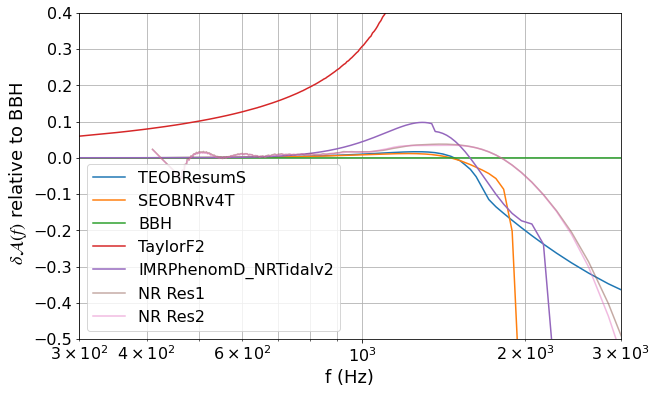

In [154]:
for apx in approx_list:
    plt.semilogx(
        strainmodels[modref]['freq'][:strainmodels[modref]['chirp']],
        strainmodels[apx]['dStrainAmp'],
                label=apx)
for apx in freq_approx_list:
    plt.semilogx(
        strainmodels[modref]['freq'][:strainmodels[modref]['chirp']],
        (freqmodels[apx]['dStrainAmp'])
         ,
                label=apx)

for sim,name in zip(simlist,namelist):
    condition=strainmodels[modref]['freq'][:strainmodels[modref]['chirp']] >410
    plt.semilogx(
        strainmodels[modref]['freq'][:strainmodels[modref]['chirp']][condition],
        np.array(simdata[name]['dStrainAmp'])[condition] ,
                label =name, alpha=0.5)
                
plt.xlim(300,3000)
plt.ylim(-.5,.4)

#plt.hlines(9.18 * 2 * np.pi /360 * np.array((-1,1)), 100,1800, linestyles="dotted", color="gray")       
plt.xlabel('f (Hz)')
plt.ylabel(r' $\delta \mathcal{A}(f)$ relative to BBH')
plt.legend(loc='lower left')
plt.grid(which='both')
plt.savefig('delta-strain-amp.png', dpi=300, bbox_inches='tight')

In [155]:
for apx in approx_list:
    strainmodels[apx]['dFdot'] = (
        -strainmodels[modref]['fdot'][:strainmodels[modref]['chirp']]+ 
        np.interp(strainmodels[modref]['freq'][:strainmodels[modref]['chirp']],
                strainmodels[apx]['freq'][:strainmodels[apx]['chirp']],
                strainmodels[apx]['fdot'][:strainmodels[apx]['chirp']])
       )/strainmodels[modref]['fdot'][:strainmodels[modref]['chirp']]

for apx in freq_approx_list:
    freqmodels[apx]['dFdot'] = (
        -strainmodels[modref]['fdot']+ 
        np.interp(strainmodels[modref]['freq'],
                freqmodels[apx]['freq'][1:],
                freqmodels[apx]['fdot'])
    )/strainmodels[modref]['fdot']
for sim,name in zip(simlist,namelist):
        simdata[name]['dFdot']= (
                -strainmodels[modref]['fdot']+ 
                np.interp(strainmodels[modref]['freq'],
                sim['freq_smooth'][sim.zero_index:sim.postmerger_index],
                sim['fdot_smooth'][sim.zero_index:sim.postmerger_index])
        )/strainmodels[modref]['fdot']

/var/folders/5w/kb6yrjj55738nlr7796lgkzh0000gp/T/ipykernel_33182/3318470720.py:17: RuntimeWarning: divide by zero encountered in true_divide
  simdata[name]['dFdot']= (


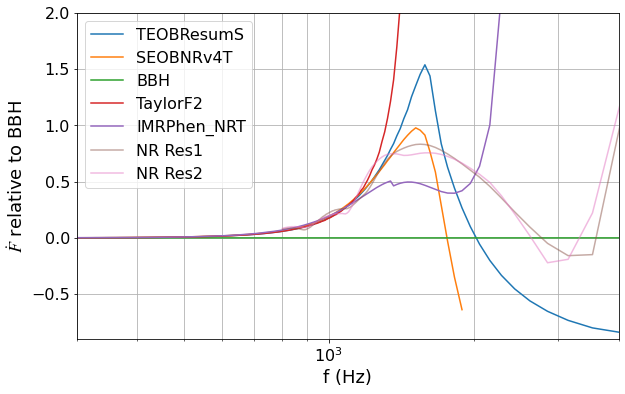

In [281]:
for apx in approx_list:
    condition = strainmodels[apx]['dStrainAmp']>-0.5
    plt.semilogx(
        strainmodels[modref]['freq'][:strainmodels[modref]['chirp']][condition],
        strainmodels[apx]['dFdot'][condition],
                label=apx)
for apx in freq_approx_list:
    plt.semilogx(
        strainmodels[modref]['freq'],
        freqmodels[apx]['dFdot'],
                label=freqmodels[apx]['name'])

for sim,name in zip(simlist,namelist):
    condition=strainmodels[modref]['freq'] >800
    plt.semilogx(
        strainmodels[modref]['freq'][condition],
        #(np.convolve(simdata[name]['dFdot'][condition], np.ones(10)/10, mode='same')), 
        simdata[name]['dFdot'][condition],
                label =name, alpha=0.5) 
#plt.hlines(9.18 * 2 * np.pi /360 * np.array((-1,1)), 100,1800, linestyles="dotted", color="gray")       
plt.xlabel('f (Hz)')
plt.ylabel(r'$\dot{F}$ relative to BBH')
plt.xlim(300,4000)
plt.ylim(-0.9,2)
plt.grid(axis='y')
plt.grid(axis='x', which='both')
plt.legend(loc='upper left')
plt.savefig('delta-Fdot.png', dpi=300, bbox_inches='tight')

/var/folders/5w/kb6yrjj55738nlr7796lgkzh0000gp/T/ipykernel_33182/3703536036.py:7: RuntimeWarning: divide by zero encountered in true_divide
  1./strainmodels[apx]['fdot'][:fcut], label=apx


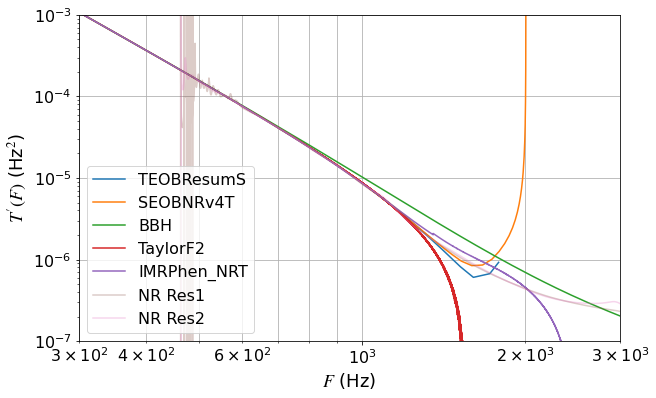

In [157]:
for apx in approx_list:
    if apx=='SEOBNRv4T':
      fcut = np.argmax(strainmodels[apx]['fdot'][:strainmodels[apx]['chirp']])
    else:
      fcut = len(strainmodels[apx]['fdot'])
    plt.loglog(strainmodels[apx]['freq'][:fcut],
                1./strainmodels[apx]['fdot'][:fcut], label=apx
    )
for apx in freq_approx_list:
    plt.semilogx(freqmodels[apx]['freq'][1:], 1./freqmodels[apx]['fdot'], label=freqmodels[apx]['name'])

for sim,name in zip(simlist,namelist):
  #condition =sim['freq_smooth'] > 700
  plt.semilogx(sim['freq_smooth'][sim.zero_index:sim.postmerger_index],
  1./sim['fdot_smooth'][sim.zero_index:sim.postmerger_index], label=name, alpha=0.3) #
plt.xlabel(r'$F$ (Hz)')
plt.ylabel(r'$T^\prime (F)$ (Hz$^{2}$)')
plt.legend(loc='lower left')
plt.xlim(300,3000)
plt.ylim(1e-7,1e-3)
plt.grid(axis='y')
plt.grid(axis='x', which='both')
plt.savefig('Tprime-compare.png', dpi=300, bbox_inches='tight')

In [158]:
for apx in approx_list:
    strainmodels[apx]['dTprime'] = (
        - 1. / strainmodels[modref]['fdot']+ 
        np.interp(strainmodels[modref]['freq'],
                strainmodels[apx]['freq'][:strainmodels[apx]['chirp']],
                1.0/ strainmodels[apx]['fdot'][:strainmodels[apx]['chirp']])
        )*strainmodels[modref]['fdot']

for apx in freq_approx_list:
    freqmodels[apx]['dTprime'] = (
        -1. / strainmodels[modref]['fdot']+ 
        np.interp(strainmodels[modref]['freq'],
                freqmodels[apx]['freq'][1:],
                1. / freqmodels[apx]['fdot'])
        )*strainmodels[modref]['fdot']
for sim,name in zip(simlist,namelist):
        simdata[name]['dTprime']= (
                -1. / strainmodels[modref]['fdot']+ 
                np.interp(strainmodels[modref]['freq'],
                sim['freq_smooth'][sim.zero_index:sim.postmerger_index],
                1. / sim['fdot_smooth'][sim.zero_index:sim.postmerger_index])
                )*strainmodels[modref]['fdot']

/var/folders/5w/kb6yrjj55738nlr7796lgkzh0000gp/T/ipykernel_33182/3293980802.py:3: RuntimeWarning: divide by zero encountered in true_divide
  - 1. / strainmodels[modref]['fdot']+
/var/folders/5w/kb6yrjj55738nlr7796lgkzh0000gp/T/ipykernel_33182/3293980802.py:2: RuntimeWarning: invalid value encountered in multiply
  strainmodels[apx]['dTprime'] = (
/var/folders/5w/kb6yrjj55738nlr7796lgkzh0000gp/T/ipykernel_33182/3293980802.py:11: RuntimeWarning: divide by zero encountered in true_divide
  -1. / strainmodels[modref]['fdot']+
/var/folders/5w/kb6yrjj55738nlr7796lgkzh0000gp/T/ipykernel_33182/3293980802.py:10: RuntimeWarning: invalid value encountered in multiply
  freqmodels[apx]['dTprime'] = (
/var/folders/5w/kb6yrjj55738nlr7796lgkzh0000gp/T/ipykernel_33182/3293980802.py:18: RuntimeWarning: divide by zero encountered in true_divide
  -1. / strainmodels[modref]['fdot']+
/var/folders/5w/kb6yrjj55738nlr7796lgkzh0000gp/T/ipykernel_33182/3293980802.py:17: RuntimeWarning: invalid value encounter

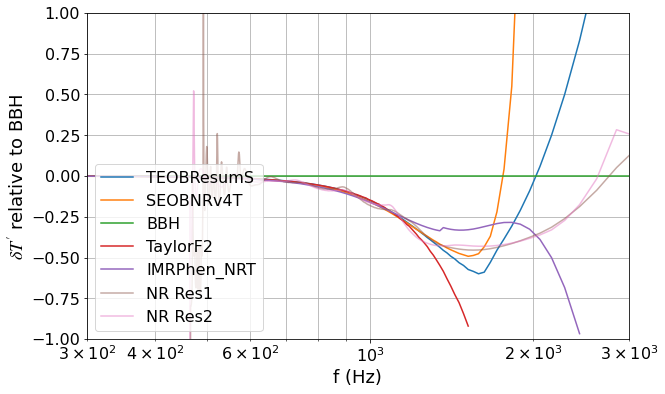

In [159]:
for apx in approx_list:
    if apx=='SEOBNRv4T':
      fcut = np.argmax(strainmodels[apx]['dTprime']>1)+1
    else:
      fcut = len(strainmodels[apx]['dTprime'])
    plt.semilogx(
        strainmodels[modref]['freq'][:fcut],
        strainmodels[apx]['dTprime'][:fcut],
                label=apx)
for apx in freq_approx_list:
    plt.semilogx(
        strainmodels[modref]['freq'],
        freqmodels[apx]['dTprime'],
                label=freqmodels[apx]['name'])

for sim,name in zip(simlist,namelist):
    condition=strainmodels[modref]['freq'] >00
    plt.semilogx(
        strainmodels[modref]['freq'][condition],
        (simdata[name]['dTprime'][condition]), 
                label =name, alpha=0.5) 
#plt.hlines(9.18 * 2 * np.pi /360 * np.array((-1,1)), 100,1800, linestyles="dotted", color="gray")       
plt.xlabel('f (Hz)')
plt.ylabel(r'$\delta T^\prime$ relative to BBH')
plt.xlim(300,3000)
plt.ylim(-1,1)
plt.grid(axis='y')
plt.grid(axis='x', which='both')
plt.legend(loc='lower left')
plt.savefig('delta-Tprime.png', dpi=300, bbox_inches='tight')

In [160]:
from lal import MTSUN_SI # mass of sun * G/c^3, in seconds
print(MTSUN_SI)
from lal import LUMPL_SI # luminosity scale in joules per second
from lal import C_SI
from lal import G_SI
from lal import MSUN_SI
# luminosity scale in solar masses c^2 per second
LUMPL_SOLAR = LUMPL_SI / (MSUN_SI * C_SI * C_SI)
print(LUMPL_SOLAR)


def x_of_gw_freq(mtot, freq):
    return np.power(mtot * MTSUN_SI * np.pi*freq , 2.0/3.0)
def orb_energy_func_of_x(mass1, mass2, x): # dimensionless binding energy
    mtotal = mass1 + mass2
    dimensionless_mass = mass1 * mass2 / (mtotal) / (mtotal)
    return - (1.0/2.0) * dimensionless_mass * x 
def luminosity_func_of_x(mass1, mass2, x): # dimensionless luminosity
    mtotal = mass1 + mass2
    dimensionless_mass = mass1 * mass2 / (mtotal) / (mtotal)
    return - 32.0 / 5.0  * dimensionless_mass* dimensionless_mass * np.power(x,5.0)




4.925491025543576e-06
203025.4435170025


In [287]:
fref=60
m1_gw170817 = 1.36
m2_gw170817 = 1.36
mtot_gw170817 = m1_gw170817+m2_gw170817
lumref = LUMPL_SI * luminosity_func_of_x(mass1,mass2,x_of_gw_freq(mtot,fref))
print('Luminosity at',fref,'Hz')
print(lumref, 'in SI units')
print(LUMPL_SOLAR * luminosity_func_of_x(mass1,mass2,x_of_gw_freq(mtot,fref)), 'in solar mass c^2 per second')
print('Orbit energy at',fref,'Hz')
enref = mtot * MSUN_SI * C_SI * C_SI * orb_energy_func_of_x(mass1,mass2,x_of_gw_freq(mtot,fref))
print(enref, 'in SI units')
print (enref/MSUN_SI / C_SI / C_SI, 'in Solar mass c^2')

Luminosity at 60 Hz
-3.1055393423036332e+43 in SI units
-0.00017377596639203075 in solar mass c^2 per second
Orbit energy at 60 Hz
-1.1130029296299882e+45 in SI units
-0.006228005456538259 in Solar mass c^2


In [288]:
# t_D
enref/lumref

35.839279653252845

In [289]:
np.sqrt(enref/lumref*fref)

46.37193956688863

In [290]:
deltaE = 0.001
print("delta A: ", 1/2 * np.sqrt(enref/lumref*fref) * deltaE * 100)
print("delta phi: ", 2 * np.pi / 3 *np.sqrt(enref/lumref*fref) * deltaE * (360/2/np.pi))

delta A:  2.3185969783444316
delta phi:  5.564632748026636


In [166]:
freqs = np.geomspace(50,4000,100)
xvals = x_of_gw_freq(mtot, freqs)
Energy = orb_energy_func_of_x(mass1,mass2,xvals)
Luminosity = luminosity_func_of_x(mass1,mass2, xvals)

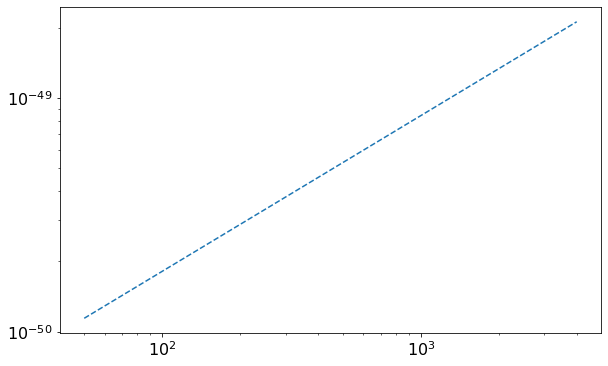

In [274]:
plt.loglog(freqs, -Energy /MSUN_SI / C_SI / C_SI, label=r'Leading order $E(F)$', linestyle='dashed')


/var/folders/5w/kb6yrjj55738nlr7796lgkzh0000gp/T/ipykernel_33182/506501977.py:7: RuntimeWarning: invalid value encountered in true_divide
  3/2*strainmodels[apx]['freq'][:fcut]/strainmodels[apx]['fdot'][:fcut], label=apx


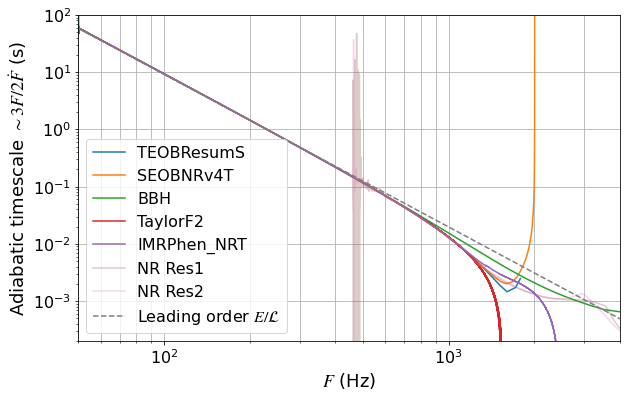

In [276]:
for apx in approx_list:
    if apx=='SEOBNRv4T':
      fcut = np.argmax(strainmodels[apx]['fdot'][:strainmodels[apx]['chirp']])
    else:
      fcut = len(strainmodels[apx]['fdot'])
    plt.loglog(strainmodels[apx]['freq'][:fcut],
                3/2*strainmodels[apx]['freq'][:fcut]/strainmodels[apx]['fdot'][:fcut], label=apx
    )

for apx in freq_approx_list:
    fcut = np.argmax(freqmodels[apx]['fdot'][1:]>3e7)
    plt.loglog( (freqmodels[apx]['freq'][1:])[:fcut],
    3/2*(freqmodels[apx]['freq'][1:])[:fcut]/freqmodels[apx]['fdot'][:fcut], label=freqmodels[apx]['name'])

for sim,name in zip(simlist,namelist):
  plt.loglog(sim['freq_smooth'][sim.zero_index:sim.postmerger_index],
  3/2*sim['freq_smooth'][sim.zero_index:sim.postmerger_index]/sim['fdot_smooth'][sim.zero_index:sim.postmerger_index], label=name, alpha=0.3) #

plt.loglog(freqs, Energy/Luminosity * MTSUN_SI *mtot, label=r'Leading order $E/\mathcal{L}$', linestyle='dashed')

plt.xlabel(r'$F$ (Hz)')
plt.ylabel(r'Adiabatic timescale $\sim 3 F/ 2 \dot F$ (s)')
plt.legend(loc='lower left')
plt.xlim(50,4000)
plt.ylim(0.0002,100)
plt.grid(axis='y')
plt.grid(axis='x', which='both')
plt.savefig('timescale.png', dpi=300, bbox_inches='tight')

# SPA Validity

In [169]:
for apx in approx_list:
    strainmodels[apx]['amplitude_derivative'] = np.gradient(strainmodels[apx]['strain_amplitude'],strainmodels[apx]['time'])
    strainmodels[apx]['phase_derivative'] = np.gradient(strainmodels[apx]['strain_phase'],strainmodels[apx]['time'])
    strainmodels[apx]['phase_dotdot'] = np.gradient(strainmodels[apx]['phase_derivative'],strainmodels[apx]['time'])
#for apx in freq_approx_list:
#    freqmodels[apx]['amplitude_derivative'] = np.gradient(freqmodels[apx]['strain_amplitude'],freqmodels[apx]['htilde_time'])

for sim,name in zip(simlist,namelist):
    sim['amplitude_derivative']= np.gradient(sim['amplitude'],sim['t_ret']*mtot*MSUN_SECONDS) 
    sim['phase_derivative']= np.gradient(sim['phase'],sim['t_ret']*mtot*MSUN_SECONDS) 
    sim['phase_dotdot']= np.gradient(sim['phase_derivative'],sim['t_ret']*mtot*MSUN_SECONDS) 

/Users/jocelynread/mambaforge/envs/igwn/lib/python3.10/site-packages/pycbc/types/array.py:213: RuntimeWarning: divide by zero encountered in true_divide
  ret = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jocelynread/mambaforge/envs/igwn/lib/python3.10/site-packages/pycbc/types/array.py:213: RuntimeWarning: invalid value encountered in true_divide
  ret = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jocelynread/mambaforge/envs/igwn/lib/python3.10/site-packages/pycbc/types/array.py:213: RuntimeWarning: divide by zero encountered in true_divide
  ret = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jocelynread/mambaforge/envs/igwn/lib/python3.10/site-packages/pycbc/types/array.py:213: RuntimeWarning: invalid value encountered in true_divide
  ret = getattr(ufunc, method)(*inputs, **kwargs)


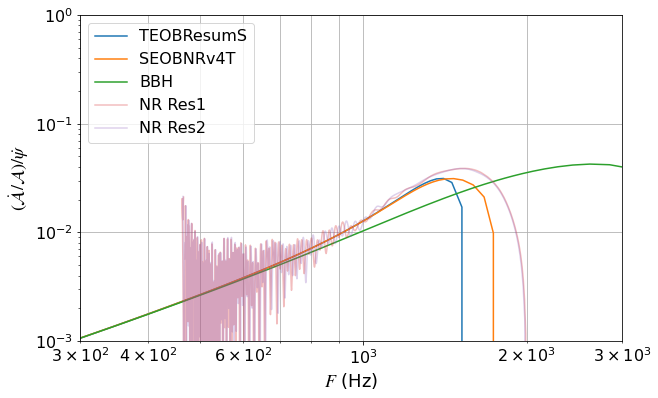

In [170]:
for apx in approx_list:
    plt.loglog(strainmodels[apx]['freq'],
                strainmodels[apx]['amplitude_derivative']/strainmodels[apx]['strain_amplitude']/strainmodels[apx]['phase_derivative'], label=apx
    )
#for apx in freq_approx_list:
#
#    plt.loglog(freqmodels[apx]['freq'][1:], 
#      freqmodels[apx]['amplitude_derivative']/freqmodels[apx]['strain_amplitude'], label=freqmodels[apx]['name'])

for sim,name in zip(simlist,namelist):
    plt.loglog(sim['freq_smooth'][sim.zero_index:sim.postmerger_index],
        sim['amplitude_derivative'][sim.zero_index:sim.postmerger_index]/sim['amplitude'][sim.zero_index:sim.postmerger_index] 
        /sim['freq_smooth'][sim.zero_index:sim.postmerger_index] / 2 / np.pi , 
                label=name, alpha=0.3)#
plt.xlabel(r'$F$ (Hz)')
plt.ylabel(r'$ (\dot \mathcal{A} / \mathcal{A}) / \dot \psi$ ')
plt.legend(loc='upper left')
plt.xlim(300,3000)
plt.ylim(1e-3,1)
plt.grid(axis='y')
plt.grid(axis='x', which='both')
plt.savefig('SPA-validity-amplitude.png', dpi=300, bbox_inches='tight')


/var/folders/5w/kb6yrjj55738nlr7796lgkzh0000gp/T/ipykernel_33182/2192896898.py:3: RuntimeWarning: divide by zero encountered in true_divide
  strainmodels[apx]['phase_dotdot']/strainmodels[apx]['phase_derivative']/strainmodels[apx]['phase_derivative'], label=apx
/var/folders/5w/kb6yrjj55738nlr7796lgkzh0000gp/T/ipykernel_33182/2192896898.py:3: RuntimeWarning: invalid value encountered in true_divide
  strainmodels[apx]['phase_dotdot']/strainmodels[apx]['phase_derivative']/strainmodels[apx]['phase_derivative'], label=apx
/var/folders/5w/kb6yrjj55738nlr7796lgkzh0000gp/T/ipykernel_33182/2192896898.py:3: RuntimeWarning: divide by zero encountered in true_divide
  strainmodels[apx]['phase_dotdot']/strainmodels[apx]['phase_derivative']/strainmodels[apx]['phase_derivative'], label=apx
/var/folders/5w/kb6yrjj55738nlr7796lgkzh0000gp/T/ipykernel_33182/2192896898.py:3: RuntimeWarning: invalid value encountered in true_divide
  strainmodels[apx]['phase_dotdot']/strainmodels[apx]['phase_derivative']

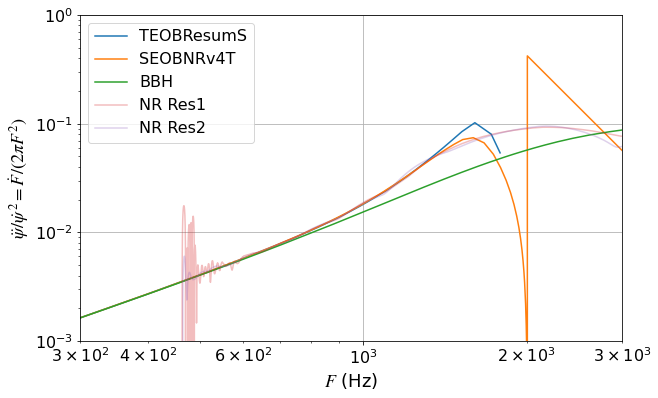

In [171]:
for apx in approx_list:
    plt.loglog(strainmodels[apx]['freq'],
                strainmodels[apx]['phase_dotdot']/strainmodels[apx]['phase_derivative']/strainmodels[apx]['phase_derivative'], label=apx
    )
#for apx in freq_approx_list:
#
#    plt.loglog(freqmodels[apx]['freq'][1:], 
#      freqmodels[apx]['amplitude_derivative']/freqmodels[apx]['strain_amplitude'], label=freqmodels[apx]['name'])

for sim,name in zip(simlist,namelist):
    plt.loglog(sim['freq_smooth'][sim.zero_index:sim.postmerger_index],
        sim['fdot_smooth'][sim.zero_index:sim.postmerger_index]  
        /sim['freq_smooth'][sim.zero_index:sim.postmerger_index]  
        /sim['freq_smooth'][sim.zero_index:sim.postmerger_index] /2 /np.pi, 
                label=name, alpha=0.3)#
plt.xlabel(r'$F$ (Hz)')
plt.ylabel(r'$ \ddot \psi / \dot \psi^2 = \dotF/(2 \pi F^2)$ ')
plt.legend(loc='upper left')
plt.xlim(300,3000)
plt.ylim(1e-3,1)
plt.grid()
#plt.savefig('amplitude-compare.png', dpi=300, bbox_inches='tight')
plt.savefig('SPA-validity-phidot.png', dpi=300, bbox_inches='tight')

# Fourier domain

In [172]:
for apx in approx_list:
    strainmodels[apx]['htilde_amplitude'] = (
      1./2. *  strainmodels[apx]['strain_amplitude'] / np.sqrt(strainmodels[apx]['fdot'] ) )

for sim,name in zip(simlist,namelist):
  sim['htilde_amplitude'] = (
                1./2. * sim['strain_amplitude']
                / np.sqrt(sim['fdot_smooth']))

/var/folders/5w/kb6yrjj55738nlr7796lgkzh0000gp/T/ipykernel_33182/1110294782.py:3: RuntimeWarning: invalid value encountered in sqrt
  1./2. *  strainmodels[apx]['strain_amplitude'] / np.sqrt(strainmodels[apx]['fdot'] ) )
/Users/jocelynread/mambaforge/envs/igwn/lib/python3.10/site-packages/pycbc/types/array.py:213: RuntimeWarning: invalid value encountered in true_divide
  ret = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jocelynread/mambaforge/envs/igwn/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jocelynread/mambaforge/envs/igwn/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


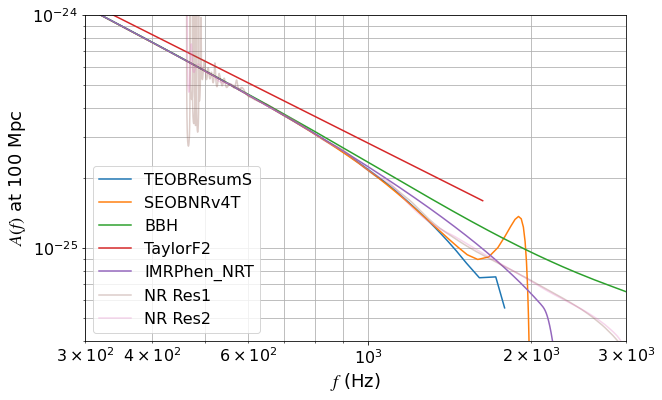

In [173]:

for apx in approx_list:
    plt.loglog(  strainmodels[apx]['freq'],
                strainmodels[apx]['htilde_amplitude']
               ,
             label=apx)
for apx in freq_approx_list:
    plt.loglog(freqmodels[apx]['freq'], freqmodels[apx]['htilde_amplitude'], label=freqmodels[apx]['name'])
for sim,name in zip(simlist,namelist):
  plt.loglog(sim['freq_smooth'][sim.zero_index:sim.postmerger_index],
              sim['htilde_amplitude'][sim.zero_index:sim.postmerger_index], 
               label=name, alpha=0.3)

#print(pycbc.psd.get_lalsim_psd_list())
delta_f = 1.0 / 4
flen = int(4096 / delta_f)
low_frequency_cutoff = 101
psdlist = {}
psdlist['aLIGO Design'] = pycbc.psd.aLIGODesignSensitivityP1200087(flen, delta_f, low_frequency_cutoff)
#psdlist['APLUS'] = pycbc.psd.aLIGOAPlusDesignSensitivityT1800042(flen, delta_f, low_frequency_cutoff)
#psdlist['CE'] = pycbc.psd.CosmicExplorerWidebandP1600143(flen, delta_f, low_frequency_cutoff)
#for name, psd in psdlist.items():
#    plt.semilogx(psd.sample_frequencies, 
#                np.sqrt(psd), color = 'grey', label=name),
#plt.legend(loc='lower left')

plt.xlim(300,3000)
plt.ylim(4e-26,1e-24)
plt.xlabel(r'$f$ (Hz)')
plt.ylabel(r'$A(f)$ at 100 Mpc')
plt.legend(loc='lower left')
plt.grid(which='both')
plt.savefig('signalamp-compare.png', dpi=300, bbox_inches='tight')

In [174]:
# INVERT THE SPA - FIND t_c' 
# calculate psi
for apx in freq_approx_list:
    freqmodels[apx]['time_ref'] = np.interp(
            common_upper_freq, freqmodels[apx]['freq'][:-1],
            freqmodels[apx]['htilde_time']) 
    freqmodels[apx]['strain_phase'] = (
        - 2 * np.pi * (0.# common_upper_freq *freqmodels[apx]['time_ref'] 
                        - freqmodels[apx]['freq'][1:] * freqmodels[apx]['htilde_time'] )
        +  freqmodels[apx]['htilde_phase'][1:])
    freqmodels[apx]['phase_ref'] = np.interp(
            common_upper_freq, freqmodels[apx]['freq'][1:],
            freqmodels[apx]['strain_phase']) 
    freqmodels[apx]['htilde_phase_ref'] = np.interp(
        common_upper_freq, freqmodels[apx]['freq'],
        freqmodels[apx]['htilde_phase'] + 2 * np.pi * freqmodels[apx]['time_ref'])
print(freqmodels[apx]['time_ref'],freqmodels[apx]['phase_ref'])

-0.0033294620581307698 2738.066001485467


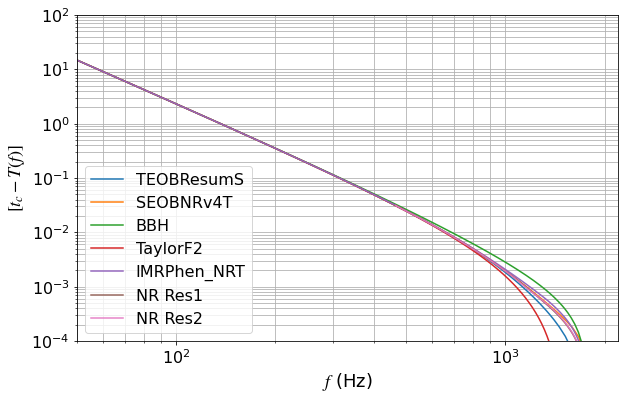

In [197]:
for apx in approx_list:
    plt.loglog(
                 strainmodels[apx]['freq'], 
                   (strainmodels[apx]['tc'] - strainmodels[apx]['time']),
                 label=apx)
for apx in freq_approx_list:
    condition = freqmodels[apx]['freq'][:-1] > 42
    plt.plot(freqmodels[apx]['freq'][:-1][condition], 
                (-freqmodels[apx]['htilde_time'][condition] + freqmodels[apx]['time_ref']
                )
             , label=freqmodels[apx]['name'])
for sim,name in zip(simlist,namelist):
  plt.plot(sim['freq_smooth'][sim.zero_index:sim.postmerger_index],
               (sim.tc - sim['t_ret'][sim.zero_index:sim.postmerger_index])
               * mtot * MSUN_SECONDS, 
               label =name, alpha=0.9)

plt.ylabel(r'$[t_c - T(f)] $')
plt.xlabel(r'$f$ (Hz)')
plt.xlim(50,2200)
plt.ylim(0.0001,100)
plt.grid(which='both')
plt.legend(loc='lower left')
plt.show()

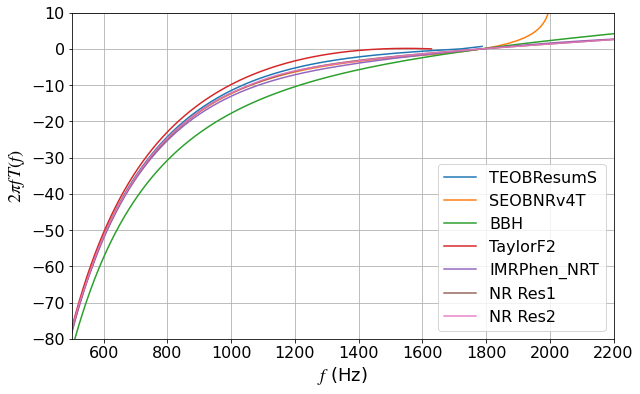

In [176]:
for apx in approx_list:
    plt.plot(
                 strainmodels[apx]['freq'][:strainmodels[apx]['chirp']+2], 
                 2 * np.pi * strainmodels[apx]['freq'][:strainmodels[apx]['chirp']+2] 
                 * (-strainmodels[apx]['tc'] + strainmodels[apx]['time'][:strainmodels[apx]['chirp']+2]),
                 label=apx)
for apx in freq_approx_list:
    plt.plot(freqmodels[apx]['freq'][:-1], 
              2 * np.pi * freqmodels[apx]['freq'][:-1] * (
                freqmodels[apx]['htilde_time'] - freqmodels[apx]['time_ref'] 
                )
             , label=freqmodels[apx]['name'])
for sim,name in zip(simlist,namelist):
  plt.plot(sim['freq_smooth'][sim.zero_index:sim.postmerger_index],
               2 * np.pi * sim['freq_smooth'][sim.zero_index:sim.postmerger_index] *
               (-sim.tc + sim['t_ret'][sim.zero_index:sim.postmerger_index])
               * mtot * MSUN_SECONDS, 
               label =name, alpha=0.9)

plt.ylabel(r'$2 \pi f \, T(f) $')
plt.xlabel(r'$f$ (Hz)')
plt.xlim(500,2200)
plt.ylim(-80,10)
plt.legend()
plt.grid()


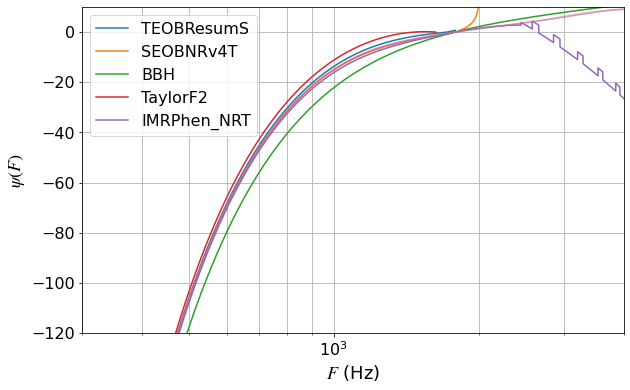

In [200]:
for apx in approx_list:
    plt.semilogx(
                 strainmodels[apx]['freq'], 
                 (-strainmodels[apx]['phic'] + strainmodels[apx]['strain_phase']),
                 label=apx)
for apx in freq_approx_list:
    plt.plot(freqmodels[apx]['freq'][:-1], 
              freqmodels[apx]['strain_phase'] - freqmodels[apx]['phase_ref'] 
             , label=freqmodels[apx]['name'])
for sim,name in zip(simlist,namelist):
  plt.plot(sim['freq_smooth'][sim.zero_index:sim.postmerger_index],
               ( sim['phase'][sim.zero_index:sim.postmerger_index]- sim.phic), 
                alpha=0.5)#label =name,

#plt.vlines(common_upper_freq,-60,10)
plt.ylabel(r'$ \psi(F)$')
plt.xlabel('$F$ (Hz)')
plt.xlim(300,4000)
plt.ylim(-120,10)
plt.legend()
plt.grid(which='both')
plt.savefig('strainphase-compare.png', dpi=300, bbox_inches='tight')


In [178]:
for apx in approx_list:
    strainmodels[apx]['phi_00']  = ( np.pi / 4.0 
        + strainmodels[apx]['strain_phase']
        - strainmodels[apx]['phic'] 
        - 2 * np.pi * strainmodels[apx]['freq'] 
            * ( strainmodels[apx]['time'] - strainmodels[apx]['tc'] )
    )

for sim in simlist:
    sim['phi_00'] =( np.pi / 4.0 
        + sim['phase'][sim.zero_index:sim.postmerger_index]
        - sim.phic 
        - 2 * np.pi * sim['freq_smooth'][sim.zero_index:sim.postmerger_index] 
            *( sim['t_ret'][sim.zero_index:sim.postmerger_index] - sim.tc)
            * mtot * MSUN_SECONDS
    )

for apx in freq_approx_list:
    freqmodels[apx]['phi_00'] =( np.pi / 4.0 
        +  freqmodels[apx]['strain_phase'] - freqmodels[apx]['phase_ref'] 
        - 2 * np.pi * freqmodels[apx]['freq'][1:] * (
                freqmodels[apx]['htilde_time'] - freqmodels[apx]['time_ref'] 
                )
    )



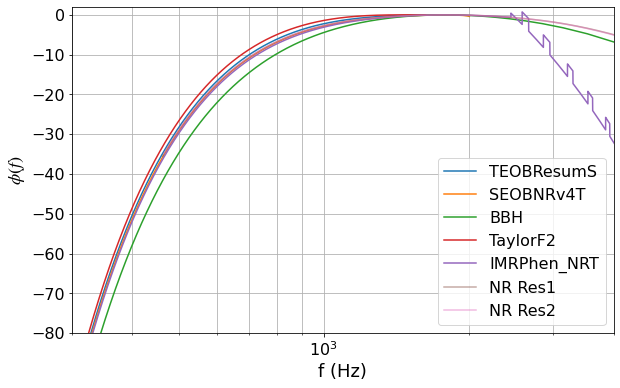

In [201]:
for apx in approx_list:
    plt.semilogx(strainmodels[apx]['freq'][:strainmodels[apx]['chirp']],
                strainmodels[apx]['phi_00'][:strainmodels[apx]['chirp']]-np.pi/4.,
                label=apx)
for apx in freq_approx_list:
    plt.semilogx(freqmodels[apx]['freq'][1:],
                freqmodels[apx]['phi_00']-np.pi/4.,
                label=freqmodels[apx]['name'])

for sim,name in zip(simlist,namelist):
    plt.semilogx(sim['freq_smooth'][sim.zero_index+100:],
               sim['phi_00'][sim.zero_index+100:]-np.pi/4., 
               label =name, alpha=0.5)  
      
plt.xlabel('f (Hz)')
plt.ylabel(r'$\phi(f)$')
plt.xlim(300,4000)
plt.ylim(-80,2)
plt.legend()
plt.grid(which='both')
plt.savefig('signalphase-compare.png', dpi=300, bbox_inches='tight')

# Interferometer PSDs

In [180]:
gw170817psddata = np.loadtxt('GWTC1_GW170817_PSDs.dat.txt',comments='#')
# download from https://dcc.ligo.org/LIGO-P1800061/public 


In [181]:
#print(pycbc.psd.get_lalsim_psd_list())
delta_f = 1.0 / 4
low_frequency_cutoff = 10
freqref = 'IMRPhenomD_NRTidalv2'
hp,hc= waveform.get_fd_waveform(approximant='IMRPhenomD_NRTidalv2',
                                 mass1=mass1,
                                 mass2=mass2,
                                 lambda1= lambda1,
                                 lambda2=lambda2 ,
                                 distance = 100,
                                 delta_f=delta_f,
                                 f_lower=10)
flen=len(hp)
psdlist = {}
snrlist={}
psdlist['17.08.17'] = pycbc.psd.from_numpy_arrays(gw170817psddata[:,0],gw170817psddata[:,2], int(2048 / delta_f), delta_f, 25)
psdlist['APLUS'] = pycbc.psd.aLIGOAPlusDesignSensitivityT1800042(flen, delta_f, low_frequency_cutoff)
psdlist['CE'] = pycbc.psd.CosmicExplorerWidebandP1600143(flen, delta_f, low_frequency_cutoff)
from pycbc.filter.matchedfilter import sigma

hp170817,hc170817= waveform.get_fd_waveform(approximant='IMRPhenomD_NRTidalv2',
                                 mass1=mass1,
                                 mass2=mass2,
                                 lambda1= lambda1,
                                 lambda2=lambda2 ,
                                 distance = 100,
                                 delta_f=delta_f,
                                 f_lower=25)
snrlist['17.08.17']=sigma(hp170817,psdlist['17.08.17'],low_frequency_cutoff=25,high_frequency_cutoff=2048)
print('17.08.17', ' SNR: ', snrlist['17.08.17'])
for name in ['APLUS','CE']:
    snrlist[name]=sigma(hp,psdlist[name],low_frequency_cutoff=10)
    print(name, ' SNR: ',snrlist[name] )
psd_linestyles ={'17.08.17':"solid",'APLUS': "dashdot", 'CE': "dashed"}

#hp = strainmodels[ref]['strain_plus'].to_frequencyseries()

17.08.17  SNR:  16.189905283177282
APLUS  SNR:  59.25926601708496
CE  SNR:  1157.8607383069068


In [182]:
for name, snr in snrlist.items():
    print(name, ': ',snr/ snrlist['17.08.17'])

17.08.17 :  1.0
APLUS :  3.6602602041569994
CE :  71.51744979694382


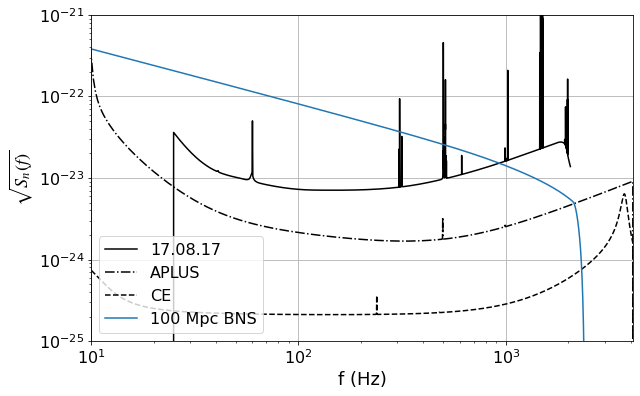

In [183]:

for name, psd in psdlist.items():
    plt.loglog(psd.sample_frequencies[1:],
                    np.sqrt(psd)[1:] 
                    ,label=name, color='black', linestyle=psd_linestyles[name])
ref_amplitude = np.interp(
                psd.sample_frequencies, 
                hp.sample_frequencies, 
                waveform.amplitude_from_frequencyseries(hp)
                )
plt.loglog(psd.sample_frequencies,2*np.sqrt(psd.sample_frequencies) *ref_amplitude, label = '100 Mpc BNS')
#plt.hlines(9.18 * 2 * np.pi /360 * np.array((-1,1)), 100,1800, linestyles="dotted", color="gray")       
plt.xlabel('f (Hz)')
plt.ylabel(r'$\sqrt{S_n(f)}$')
plt.xscale('log')
plt.ylim(1e-25,1e-21)
plt.xlim(10,psd.sample_frequencies[-1])
plt.legend(loc='lower left')
plt.grid()

# Reference waveform and deltas

In [184]:
ref='TEOBResumS'

In [185]:

for apx in approx_list:
    strainmodels[apx]['dAmp'] = (
        -strainmodels[ref]['htilde_amplitude'][:strainmodels[ref]['chirp']] 
        + np.interp(strainmodels[ref]['freq'][:strainmodels[ref]['chirp']],
                strainmodels[apx]['freq'][:strainmodels[apx]['chirp']],
                strainmodels[apx]['htilde_amplitude'][:strainmodels[apx]['chirp']])
        ) / strainmodels[ref]['htilde_amplitude'][:strainmodels[ref]['chirp']]

for apx in freq_approx_list:
    freqmodels[apx]['dAmp'] = (
        -strainmodels[ref]['htilde_amplitude'][:strainmodels[ref]['chirp']] 
        + np.interp(strainmodels[ref]['freq'][:strainmodels[ref]['chirp']],
                freqmodels[apx]['freq'],
                freqmodels[apx]['htilde_amplitude'])
         ) / strainmodels[ref]['htilde_amplitude'][:strainmodels[ref]['chirp']]

for sim,name in zip(simlist,namelist):
        simdata[name]['dAmp']= (
                -strainmodels[ref]['htilde_amplitude'][:strainmodels[ref]['chirp']]
                + np.interp(strainmodels[ref]['freq'][:strainmodels[ref]['chirp']],
                sim['freq_smooth'][sim.zero_index:sim.postmerger_index],
                sim['htilde_amplitude'][sim.zero_index:sim.postmerger_index])
         ) / strainmodels[ref]['htilde_amplitude'][:strainmodels[ref]['chirp']]

/Users/jocelynread/mambaforge/envs/igwn/lib/python3.10/site-packages/pycbc/types/array.py:213: RuntimeWarning: invalid value encountered in true_divide
  ret = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jocelynread/mambaforge/envs/igwn/lib/python3.10/site-packages/pycbc/types/array.py:213: RuntimeWarning: divide by zero encountered in true_divide
  ret = getattr(ufunc, method)(*inputs, **kwargs)


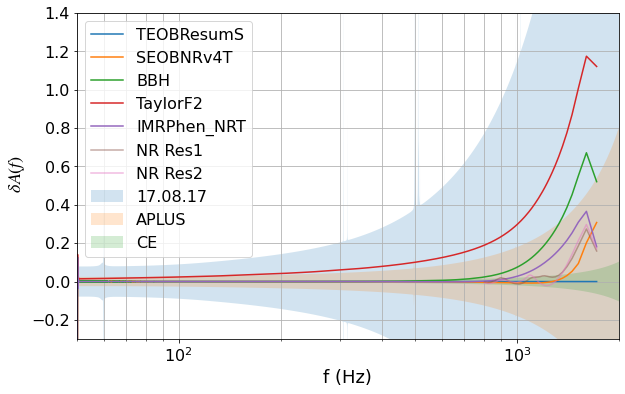

In [186]:
for apx in approx_list:
    plt.semilogx(
        strainmodels[ref]['freq'][:strainmodels[ref]['chirp']],
        strainmodels[apx]['dAmp'],
                label=apx)
for apx in freq_approx_list:
    plt.semilogx(
        strainmodels[ref]['freq'][:strainmodels[ref]['chirp']],
        (freqmodels[apx]['dAmp'])
         , label=freqmodels[apx]['name'])
for sim,name in zip(simlist,namelist):
    condition=strainmodels[ref]['freq'][:strainmodels[ref]['chirp']] >800
    plt.semilogx(
        strainmodels[ref]['freq'][:strainmodels[ref]['chirp']][condition],
        np.array(simdata[name]['dAmp'][condition]) ,
                label =name, alpha=0.5)
                
for name, psd in psdlist.items():
    ref_amplitude = np.interp(
                psd.sample_frequencies, 
                hp.sample_frequencies, 
                waveform.amplitude_from_frequencyseries(hp)
                )
    plt.fill_between(psd.sample_frequencies,
                    -np.sqrt(psd) / ref_amplitude /  np.sqrt(psd.sample_frequencies)/2,
                    np.sqrt(psd) / ref_amplitude/  np.sqrt(psd.sample_frequencies)/2
                    ,alpha=0.2,label=name)
#plt.hlines(0.1129 * np.array((-1,1)), 100,1800, linestyles="dotted", color="gray")       
plt.xlabel('f (Hz)')
plt.ylabel(r' $\delta A(f)$')
plt.xlim(50,2000)
plt.ylim(-0.3,1.4)
plt.legend(loc='upper left')
plt.grid(which='both')
plt.savefig('delta-amp.png', dpi=300, bbox_inches='tight')

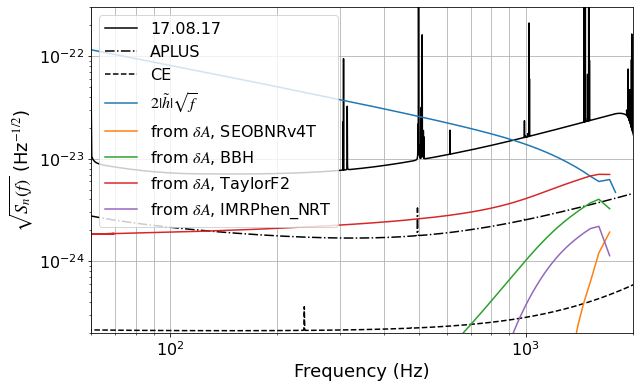

In [187]:
for name, psd in psdlist.items():
    plt.loglog(psd.sample_frequencies, 
                np.sqrt(psd) , label =name, color='black', linestyle = psd_linestyles[name])

plt.loglog(strainmodels[ref]['freq'], 
        2 * strainmodels[ref]['htilde_amplitude'] * np.sqrt(strainmodels[ref]['freq']), 
        label=r'$2|\tilde{h}| \sqrt{f}$')

ref_amplitude = strainmodels[ref]['htilde_amplitude'][:strainmodels[ref]['chirp']]

for apx in approx_list[1:]:   
    plt.loglog(
        strainmodels[ref]['freq'][:strainmodels[ref]['chirp']],
        2 * ref_amplitude * np.sqrt(strainmodels[ref]['freq'][:strainmodels[ref]['chirp']]) * 
        strainmodels[apx]['dAmp'],
    label=r'from $\delta A$, '+apx)
for apx in freq_approx_list:
    plt.loglog(
        strainmodels[ref]['freq'][:strainmodels[ref]['chirp']],
        2 * ref_amplitude * np.sqrt(strainmodels[ref]['freq'][:strainmodels[ref]['chirp']]) * 
        freqmodels[apx]['dAmp']
        ,
    label=r'from $\delta A$, '+freqmodels[apx]['name'])

plt.ylim(2e-25,3e-22)
plt.xlim(60,2000)
plt.legend(loc="upper left")
plt.xlabel("Frequency (Hz)")
plt.ylabel(r'$\sqrt{S_n(f)}$ (Hz$^{-1/2}$)')
plt.grid(axis='y')
plt.grid(axis='x',which='both')
plt.savefig('dA-strain-difference-compare-detector.png', dpi=300, bbox_inches='tight')

In [188]:
for apx in approx_list:
    strainmodels[apx]['dphi'] = (
        -strainmodels[ref]['phi_00']+ 
        np.interp(strainmodels[ref]['freq'],
                strainmodels[apx]['freq'][:strainmodels[apx]['chirp']],
                strainmodels[apx]['phi_00'][:strainmodels[apx]['chirp']])
        )

for apx in freq_approx_list:
    freqmodels[apx]['dphi'] = (
        -strainmodels[ref]['phi_00']+ 
        np.interp(strainmodels[ref]['freq'],
                freqmodels[apx]['freq'][1:],
                freqmodels[apx]['phi_00'])
        )
for sim,name in zip(simlist,namelist):
        simdata[name]['dphi']= (
                -strainmodels[ref]['phi_00']+ 
                np.interp(strainmodels[ref]['freq'],
                sim['freq_smooth'][sim.zero_index:sim.postmerger_index],
                sim['phi_00'][sim.zero_index:sim.postmerger_index])
                )

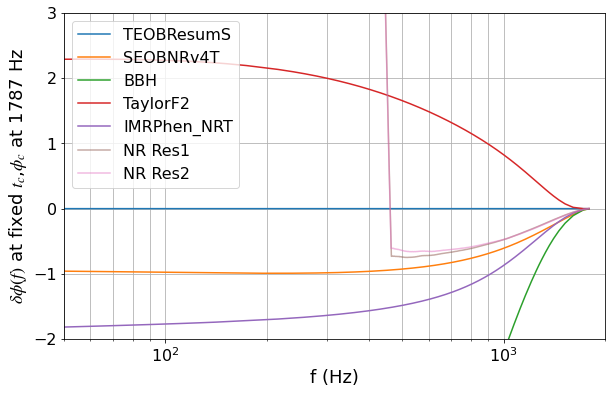

In [209]:
for apx in approx_list:
    plt.semilogx(
        strainmodels[ref]['freq'],
        strainmodels[apx]['dphi'],
                label=apx)
for apx in freq_approx_list:
    plt.semilogx(
        strainmodels[ref]['freq'],
        freqmodels[apx]['dphi'],
                label=freqmodels[apx]['name'])

for sim,name in zip(simlist,namelist):
    plt.semilogx(
        strainmodels[ref]['freq'],
        (simdata[name]['dphi'] ), 
                label =name, alpha=0.5) 
#plt.hlines(9.18 * 2 * np.pi /360 * np.array((-1,1)), 100,1800, linestyles="dotted", color="gray")       
plt.xlabel('f (Hz)')
plt.ylabel(r'$\delta\phi(f)$ at fixed $t_c$,$\phi_c$ at '+str(np.int32(common_upper_freq))+' Hz')
plt.xlim(50,2000)
plt.ylim(-2,3)
plt.grid(axis='y')
plt.grid(axis='x', which='both')
plt.legend(loc='upper left')
plt.savefig('delta-phi.png', dpi=300, bbox_inches='tight')

In [ ]:
# align numerical simulations

#align_freq = np.max([sim['freq_inst'][sim.zero_index] for sim in simlist])
align_freq=700 #arbitrary choice
print(align_freq)

# find tc and phic for this frequency
strainmodels[ref]['align_tc'] = np.interp(
        align_freq, 
        strainmodels[ref]['freq'][:strainmodels[ref]['chirp']],
        strainmodels[ref]['time'][:strainmodels[ref]['chirp']])
strainmodels[ref]['align_phic'] = np.interp(
        align_freq, 
        strainmodels[ref]['freq'][:strainmodels[ref]['chirp']],
        strainmodels[ref]['strain_phase'][:strainmodels[ref]['chirp']])
for sim in simlist:
    sim.align_tc = np.interp(
        align_freq, 
        sim['freq_smooth'][sim.zero_index:sim.postmerger_index],
        sim['t_ret'][sim.zero_index:sim.postmerger_index] # this is still in simulation units of M
    )
    sim.align_phic = np.interp(
        align_freq, 
        sim['freq_smooth'][sim.zero_index:sim.postmerger_index],
        sim['phase'][sim.zero_index:sim.postmerger_index]
    )
# compute fourier phase
strainmodels[ref]['align_phi_00']  = ( np.pi / 4.0 
        + strainmodels[ref]['strain_phase']
        - strainmodels[ref]['align_phic'] 
        - 2 * np.pi * strainmodels[ref]['freq'] 
            * ( strainmodels[ref]['time'] - strainmodels[ref]['align_tc'] )
    )
for sim in simlist:
    sim['align_phi_00'] =( np.pi / 4.0 
        + sim['phase'][sim.zero_index:sim.postmerger_index]
        - sim.align_phic 
        - 2 * np.pi * sim['freq_smooth'][sim.zero_index:sim.postmerger_index] 
            *( sim['t_ret'][sim.zero_index:sim.postmerger_index] - sim.align_tc)
            * mtot * MSUN_SECONDS
    )

# calculate phase difference from reference model
for sim,name in zip(simlist,namelist):
        simdata[name]['align_dphi']= (
                np.interp(strainmodels[ref]['freq'],
                sim['freq_smooth'][sim.zero_index:sim.postmerger_index],
                sim['align_phi_00'][sim.zero_index:sim.postmerger_index])
                -strainmodels[ref]['align_phi_00'] 
                )

#plt.semilogx(strainmodels[ref]['freq'][:strainmodels[ref]['chirp']],
#                strainmodels[ref]['align_phi_00'][:strainmodels[ref]['chirp']]-np.pi/4.,
#                label=apx)

#for sim,name in zip(simlist,namelist):
#    plt.semilogx(sim['freq_smooth'][sim.zero_index+100:],
#               sim['align_phi_00'][sim.zero_index+100:]-np.pi/4., 
#               label =name, alpha=0.5)  
#plt.ylim(-100,1)
#plt.xlim(400,3000)
#condition =strainmodels[ref]['freq'] > 450
#for sim,name in zip(simlist,namelist):
#    plt.semilogx(
#        strainmodels[ref]['freq'][condition],
#        (simdata[name]['align_dphi'][condition] ), 
#                label =name, alpha=0.5) 


In [190]:
# match in bucket
flow=50
fhigh=200
condition = (strainmodels[ref]['freq']>flow)  & (strainmodels[ref]['freq']<fhigh)
from numpy import polynomial
for apx in approx_list:
    strainmodels[apx]['fit'] = polynomial.Polynomial.fit(
        strainmodels[ref]['freq'][condition  ], 
        strainmodels[apx]['dphi'][condition], 
        1,domain=[flow,fhigh])
    print(strainmodels[apx]['fit'](strainmodels[ref]['freq']))
for apx in freq_approx_list:
    freqmodels[apx]['fit'] = polynomial.Polynomial.fit(
        strainmodels[ref]['freq'][condition], 
        freqmodels[apx]['dphi'][condition ], 
        1,domain=[flow,fhigh])
    print(freqmodels[apx]['fit'](strainmodels[ref]['freq']))


[0. 0. 0. ... 0. 0. 0.]
[-0.96055291 -0.96055291 -0.96055291 ... -1.40214855 -1.43504534
 -1.45378676]
[-11.847281   -11.847281   -11.847281   ...   8.62841464  10.15375719
  11.02275041]
[2.29903115 2.29903115 2.29903115 ... 1.26517339 1.18815587 1.14427871]
[-1.81176581 -1.81176581 -1.81176581 ... -0.54654991 -0.45229731
 -0.39860126]


In [260]:
# fit with weights
flow=50
fhigh=2048
ref_amplitude = np.interp(
                strainmodels[ref]['freq'], 
                hp.sample_frequencies, 
                waveform.amplitude_from_frequencyseries(hp))
align_psd = '17.08.17'
ref_sigma = np.interp(strainmodels[ref]['freq'], 
                psdlist[align_psd].sample_frequencies,
                psdlist[align_psd] 
)
align_weights = ref_amplitude*ref_amplitude / ref_sigma

#plt.semilogx(strainmodels[ref]['freq'],align_weights)
for apx in approx_list:
    strainmodels[apx]['fit'] = polynomial.Polynomial.fit(
        strainmodels[ref]['freq']  , 
        strainmodels[apx]['dphi'], 
        1, w=align_weights,
                domain=[flow,fhigh])
    print(strainmodels[apx]['fit'](strainmodels[ref]['freq']))
for apx in freq_approx_list:
    freqmodels[apx]['fit'] = polynomial.Polynomial.fit(
        strainmodels[ref]['freq'], 
        freqmodels[apx]['dphi'], 
        1, w=align_weights,
                domain=[flow,fhigh])
    print(freqmodels[apx]['fit'](strainmodels[ref]['freq']))

[0. 0. 0. ... 0. 0. 0.]
[-0.95926759 -0.95926759 -0.95926759 ... -1.51902835 -1.56072788
 -1.58448425]
[-11.8498701  -11.8498701  -11.8498701  ...   8.86205065  10.40499086
  11.28400953]
[2.29341702 2.29341702 2.29341702 ... 1.78095197 1.74277575 1.72102661]
[-1.8137897  -1.8137897  -1.8137897  ... -0.35902841 -0.25065557
 -0.18891517]


/Users/jocelynread/mambaforge/envs/igwn/lib/python3.10/site-packages/pycbc/types/array.py:213: RuntimeWarning: invalid value encountered in true_divide
  ret = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jocelynread/mambaforge/envs/igwn/lib/python3.10/site-packages/pycbc/types/array.py:213: RuntimeWarning: divide by zero encountered in true_divide
  ret = getattr(ufunc, method)(*inputs, **kwargs)


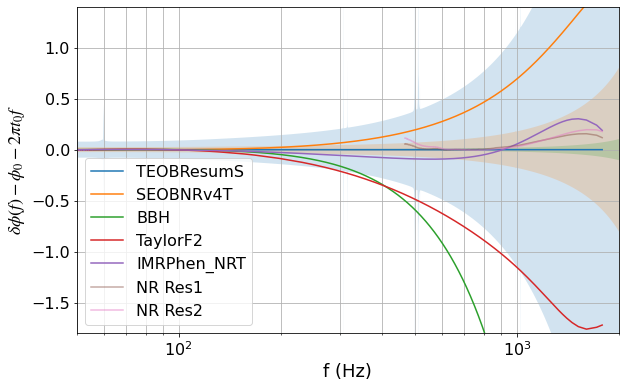

In [261]:
for apx in approx_list:
    plt.semilogx(
        strainmodels[ref]['freq'],
        strainmodels[apx]['dphi'] - strainmodels[apx]['fit'](strainmodels[ref]['freq']),
    label=apx)
for apx in freq_approx_list:
    plt.plot(
        strainmodels[ref]['freq'],
        (freqmodels[apx]['dphi'] - freqmodels[apx]['fit'](strainmodels[ref]['freq'])),
        label=freqmodels[apx]['name'])

for sim,name in zip(simlist,namelist):
    condition =strainmodels[ref]['freq'] > sim['freq_inst'][sim.zero_index] 
    plt.semilogx(
        strainmodels[ref]['freq'][condition],
        (simdata[name]['align_dphi'][condition] ), 
                label =name, alpha=0.5) 

for name, psd in psdlist.items():
    ref_amplitude = np.interp(
                psd.sample_frequencies, 
                hp.sample_frequencies, 
                waveform.amplitude_from_frequencyseries(hp)
                )
    plt.fill_between(psd.sample_frequencies,
                    -np.sqrt(psd) / ref_amplitude / np.sqrt(psd.sample_frequencies)/2,
                    np.sqrt(psd) / ref_amplitude / np.sqrt(psd.sample_frequencies)/2
                    ,alpha=0.2)#,label=name)
#plt.hlines(9.18 * 2 * np.pi /360 * np.array((-1,1)), 50,1800, linestyles="dotted", color="gray")       
plt.xlabel('f (Hz)')
plt.ylabel(r'$\delta\phi(f) - \phi_0  - 2\pi t_0 f$')
plt.xlim(50,2000)
plt.ylim(-1.8,1.4)
plt.grid(which='both')
plt.legend(loc='lower left')
plt.savefig('dph-compare-detector.png', dpi=300, bbox_inches='tight')

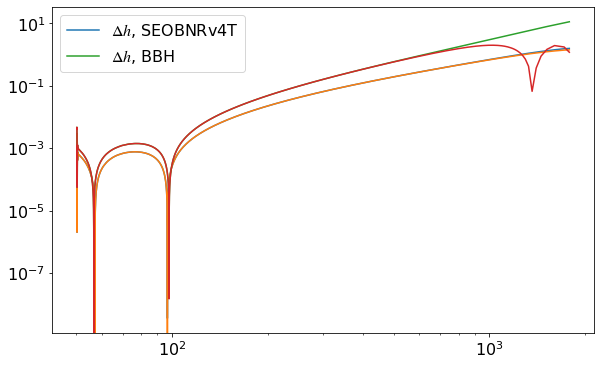

In [263]:
for apx in approx_list[1:]:   
    plt.loglog(
        strainmodels[ref]['freq'],
        np.abs(strainmodels[apx]['dphi'] - strainmodels[apx]['fit'](strainmodels[ref]['freq']))
        ,
    label=r'$\Delta h$, '+apx)
    plt.loglog(
        strainmodels[ref]['freq'],
        np.sqrt(2.0- 2.0 *np.cos(np.abs(strainmodels[apx]['dphi'] - strainmodels[apx]['fit'](strainmodels[ref]['freq'])) ))
    )
    #,label=r'$\Delta h$, cos'+apx)
plt.legend()
#plt.ylim(1e-2,10)

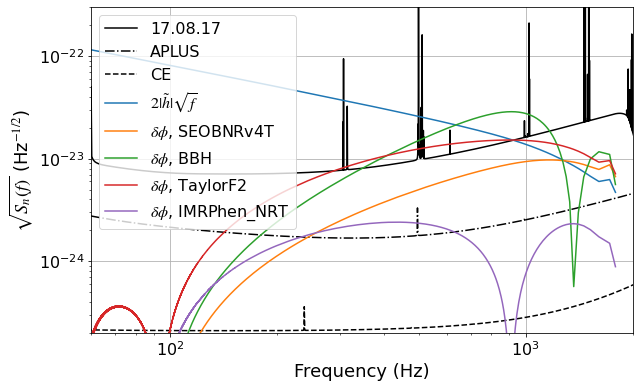

In [ ]:
for name, psd in psdlist.items():
    plt.loglog(psd.sample_frequencies, 
                np.sqrt(psd) , label =name, color='black', linestyle = psd_linestyles[name])

plt.loglog(strainmodels[ref]['freq'], 
        2 * strainmodels[ref]['htilde_amplitude'] * np.sqrt(strainmodels[ref]['freq']), 
        label=r'$2|\tilde{h}| \sqrt{f}$')

ref_amplitude = strainmodels[ref]['htilde_amplitude']
for apx in approx_list[1:]:   
    plt.loglog(
        strainmodels[ref]['freq'],
        2 * ref_amplitude * np.sqrt(strainmodels[ref]['freq']) * 
        np.sqrt((2.0 - 2.0* np.cos(np.abs(strainmodels[apx]['dphi'] - strainmodels[apx]['fit'](strainmodels[ref]['freq'])) )))
        ,
    label=r'$\delta \phi$, '+apx)
for apx in freq_approx_list:
    plt.loglog(
        strainmodels[ref]['freq'],
        2 * ref_amplitude * np.sqrt(strainmodels[ref]['freq']) * 
        np.sqrt((2.0 - 2.0 *np.cos(np.abs(freqmodels[apx]['dphi'] - freqmodels[apx]['fit'](strainmodels[ref]['freq']) ))))
        ,
    label=r'$\delta \phi$, '+freqmodels[apx]['name'])
    
plt.ylim(2e-25,3e-22)
#plt.ylim(2e-25,1e-22)
plt.xlim(60,2000)
plt.grid(axis='y')
plt.grid(axis='x')
plt.legend(loc="upper left")
plt.xlabel("Frequency (Hz)")
plt.ylabel(r'$\sqrt{S_n(f)}$ (Hz$^{-1/2}$)')
plt.savefig('strain-difference-compare-detector.png', dpi=300, bbox_inches='tight')

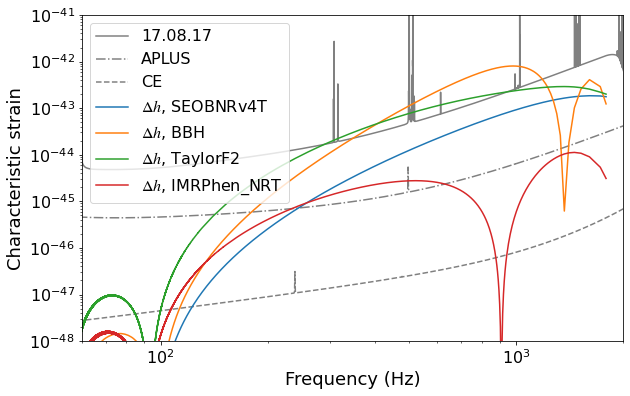

In [ ]:
#CHARACTERISTIC STRAIN PLOT
for name, psd in psdlist.items():
    plt.loglog(psd.sample_frequencies, 
                psd * psd.sample_frequencies , label =name, color='gray', linestyle = psd_linestyles[name])

ref_amplitude = np.interp(
                psdlist['CE'].sample_frequencies, 
                hp.sample_frequencies, 
                waveform.amplitude_from_frequencyseries(hp)
                )
#plt.loglog(psdlist['CE'].sample_frequencies, 
#        4 * ref_amplitude * ref_amplitude * psdlist['CE'].sample_frequencies * psdlist['CE'].sample_frequencies 
#        ) 
#      #  label=r'$2|\tilde{h}| \sqrt{f}$')

ref_amplitude = np.interp(
                strainmodels[ref]['freq'], 
                hp.sample_frequencies, 
                waveform.amplitude_from_frequencyseries(hp)
                )

for apx in approx_list[1:]:   
    plt.loglog(
        strainmodels[ref]['freq'],
        4. * ref_amplitude * ref_amplitude * strainmodels[ref]['freq'] * strainmodels[ref]['freq'] *
        ( 
        2. - 2. * np.cos(np.abs(
            strainmodels[apx]['dphi'] - strainmodels[apx]['fit'](strainmodels[ref]['freq']) 
            ))),
    label=r'$\Delta h$, '+apx)

for apx in freq_approx_list:
    plt.loglog(
        strainmodels[ref]['freq'],
        4. * ref_amplitude * ref_amplitude 
        * strainmodels[ref]['freq'] * strainmodels[ref]['freq'] * 
        (
        2. - 2.* np.cos(np.abs(
            freqmodels[apx]['dphi'] - freqmodels[apx]['fit'](strainmodels[ref]['freq']) 
            ))),
    label=r'$\Delta h$, '+freqmodels[apx]['name'])
plt.xlim(60,2000)
plt.ylim(1e-48, 1e-41)
plt.legend(loc="upper left")
plt.xlabel("Frequency (Hz)")
plt.ylabel(r'Characteristic strain')
plt.savefig('characteristic-strain-compare-detector.png', dpi=300, bbox_inches='tight')

#  Goal values

/Users/jocelynread/mambaforge/envs/igwn/lib/python3.10/site-packages/pycbc/types/array.py:213: RuntimeWarning: invalid value encountered in true_divide
  ret = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jocelynread/mambaforge/envs/igwn/lib/python3.10/site-packages/pycbc/types/array.py:213: RuntimeWarning: divide by zero encountered in true_divide
  ret = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jocelynread/mambaforge/envs/igwn/lib/python3.10/site-packages/pycbc/types/array.py:213: RuntimeWarning: invalid value encountered in true_divide
  ret = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jocelynread/mambaforge/envs/igwn/lib/python3.10/site-packages/pycbc/types/array.py:213: RuntimeWarning: divide by zero encountered in true_divide
  ret = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jocelynread/mambaforge/envs/igwn/lib/python3.10/site-packages/pycbc/types/array.py:213: RuntimeWarning: invalid value encountered in true_divide
  ret = getattr(ufunc, method)(*inputs

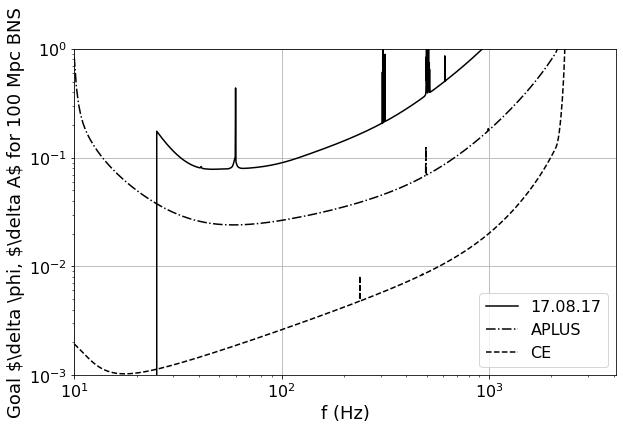

In [ ]:
cut=1
for name, psd in psdlist.items():
    ref_amplitude = np.interp(
                psd.sample_frequencies, 
                hp.sample_frequencies, 
                waveform.amplitude_from_frequencyseries(hp)
                )
    plt.loglog(psd.sample_frequencies[cut:],
                   # -np.sqrt(psd) / ref_amplitude /  np.sqrt(psd.sample_frequencies)/2,
                    np.sqrt(psd)[cut:] / ref_amplitude[cut:]/  np.sqrt(psd.sample_frequencies[cut:])/2
                    ,label=name, color='black', linestyle=psd_linestyles[name])
#plt.hlines(9.18 * 2 * np.pi /360 * np.array((-1,1)), 100,1800, linestyles="dotted", color="gray")       
plt.xlabel('f (Hz)')
plt.ylabel(r'Goal $\delta \phi, $\delta A$ for 100 Mpc BNS')
plt.xscale('log')
plt.xlim(10,psd.sample_frequencies[-1])
plt.ylim(1e-3,1)
plt.legend(loc='lower right')
plt.grid()
plt.savefig('psd-goal-error.png', dpi=300, bbox_inches='tight')

/Users/jocelynread/mambaforge/envs/igwn/lib/python3.10/site-packages/pycbc/types/array.py:213: RuntimeWarning: invalid value encountered in true_divide
  ret = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jocelynread/mambaforge/envs/igwn/lib/python3.10/site-packages/pycbc/types/array.py:213: RuntimeWarning: divide by zero encountered in true_divide
  ret = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jocelynread/mambaforge/envs/igwn/lib/python3.10/site-packages/pycbc/types/array.py:213: RuntimeWarning: invalid value encountered in true_divide
  ret = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jocelynread/mambaforge/envs/igwn/lib/python3.10/site-packages/pycbc/types/array.py:213: RuntimeWarning: divide by zero encountered in true_divide
  ret = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jocelynread/mambaforge/envs/igwn/lib/python3.10/site-packages/pycbc/types/array.py:213: RuntimeWarning: invalid value encountered in true_divide
  ret = getattr(ufunc, method)(*inputs

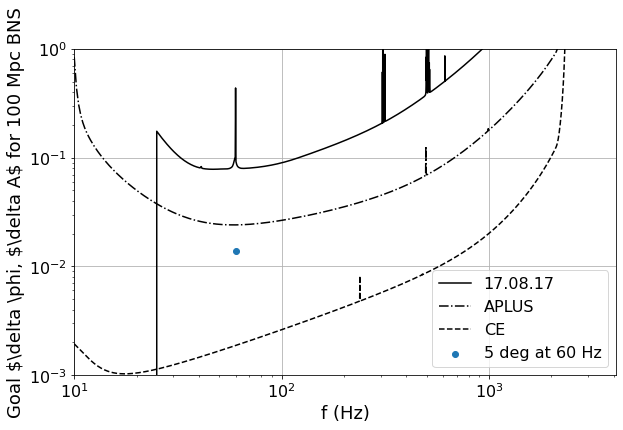

In [293]:
cut=1
for name, psd in psdlist.items():
    ref_amplitude = np.interp(
                psd.sample_frequencies, 
                hp.sample_frequencies, 
                waveform.amplitude_from_frequencyseries(hp)
                )
    plt.loglog(psd.sample_frequencies[cut:],
                   # -np.sqrt(psd) / ref_amplitude /  np.sqrt(psd.sample_frequencies)/2,
                    np.sqrt(psd)[cut:] / ref_amplitude[cut:]/  np.sqrt(psd.sample_frequencies[cut:])/2
                    ,label=name, color='black', linestyle=psd_linestyles[name])
plt.scatter(60,5/360, label = '5 deg at 60 Hz')
#plt.hlines(9.18 * 2 * np.pi /360 * np.array((-1,1)), 100,1800, linestyles="dotted", color="gray")       
plt.xlabel('f (Hz)')
plt.ylabel(r'Goal $\delta \phi, $\delta A$ for 100 Mpc BNS')
plt.xscale('log')
plt.xlim(10,psd.sample_frequencies[-1])
plt.ylim(1e-3,1)
plt.legend(loc='lower right')
plt.grid()
plt.savefig('psd-goal-error.png', dpi=300, bbox_inches='tight')

In [ ]:
for apx in approx_list:
  # phase correction from the next largest term in stationary phase approximation
  # this is just from the Droz paper, should update with Hughes Fdot
  strainmodels[apx]['htilde_phase_corr'] =  \
    + 92. / 45. * np.power(np.pi * mchirp *MSUN_SECONDS * strainmodels[apx]['freq'], 5.0/3) 

  #strainmodels[apx]['htilde_phase_gradient'] = np.gradient(strainmodels[apx]['htilde_phase'],strainmodels[apx]['freq'])

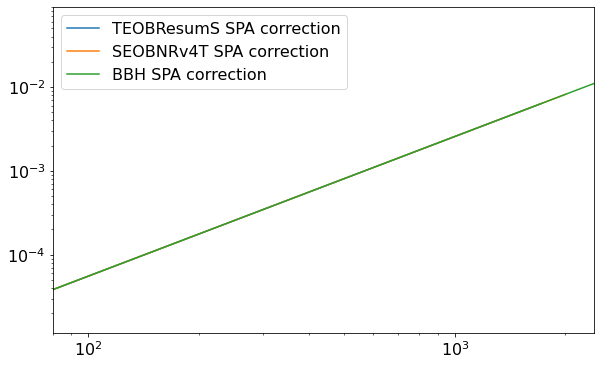

In [ ]:
for apx in approx_list:
    plt.loglog( 
        strainmodels[apx]['freq'][:strainmodels[apx]['chirp']], 
         strainmodels[apx]['htilde_phase_corr'][:strainmodels[apx]['chirp']]
        , label=apx+' SPA correction')
plt.xlim(80,2400)
plt.legend()